<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 500>
<h1 align=center><font size = 6,5>Final Project 3 (Ensemble)</font></h1>

------------------------------------------------

# Kelompok 3 - PYTN KS 014

Nurul Fajriyah Al Maulidiyah  : PYTN-KS14-001 <br>
Fransisca Mulya Sari          : PYTN-KS14-011 <br>

MSIB Kampus Merdeka Batch 4 (Mei, 2023)

----------------------------------
# A. Perkenalan

## A.1. Latar Belakang
Cardiovascular diseases (CVDs) adalah penyebab kematian nomor 1 secara global yang merenggut sekitar 17,9 juta nyawa setiap tahun, yang merupakan 31% dari semua kematian di seluruh dunia. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD. Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya dengan menggunakan strategi populasi luas.

Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan penanganan dini di mana model pembelajaran mesin dapat sangat membantu. Pada project ini, kami ingin melakukan prediksi pada kematian pasien gagal jantung dengan menggunakan konsep classification dan model ensemble.

Kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. **DEATH_EVENT** adalah variabel target untuk diprediksi, apakah pasien sudah meninggal saat waktu follow-up dengan pilihan 1:Yes dan 0:No. 


## A.2. Dataset
Analisis ini menggunakan data yang bersumber dari kaggle yaitu [Heart Failure Prediction](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)


## A.3. Objektif
Objektif yang ingin dicapai antara lain:
- Untuk mengetahui faktor-faktor yang berpengaruh dalam memprediksi keselamatan pasien dari penyakit jantung
- Untuk membuat model ensemble yang dianggap paling sesuai dengan konsep classification sehingga diperoleh akurasi yang tinggi
- Untuk memprediksi keselamatan pasien dari penyakit jantung berdasarkan faktor-faktor yang mempengaruhinya menggunakan model ensemble

# B. Import Library

In [1]:
# Import library dataframe
import numpy as np 
from numpy import mean 
import pandas as pd 

# Import library untuk visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

# Import library untuk preprocessing 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

# Import library untuk modelling/analysis
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from matplotlib import pyplot
from numpy import where

# Import library untuk balancing data
from imblearn.over_sampling import SMOTE

# Import library untuk model improvement
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.datasets import make_classification

# Import library untuk mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore")

print('Import Library Berhasil dilakukan ^_^')

Import Library Berhasil dilakukan ^_^


# C. Data Loading
Data Loading adalah proses menyalin dan memuat data atau kumpulan data dari file sumber, folder atau aplikasi ke database atau aplikasi serupa. Pada project ini, data loading dilakukan dengan cara import file csv.

## C.1. Memanggil dataset

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

**Keterangan dataset:**

Dataset ini berisi 13 kolom yang bertipe data integer, float, dan object. Masing-masing kolom memiliki arti tersendiri, yaitu sebagai berikut:

1. `age` = umur pasien (antara 40-95)
2. `anaemia` = apakah ada pengurangan haemoglobin (Yes:1, No:0)
3. `creatinine_phosphokinase` = level enzim CPK dalam mcg/L
4. `diabetes` = apakah pasien punya riwayat diabetes (Yes:1, No:0)
5. `ejection_fraction` = persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. `high_blood_pressure` = apakah pasien punya darah tinggi (Yes:1, No:0)
7. `platelets` = jumlah platelet di darah dalam kiloplatelets/mL
8. `serum_creatinine` = level serum creatinine di darah dalam mg/dL
9. `serum_sodium` = level serum sodium di darah dalam mEq/L
10. `sex` = apakah pasien pria atau wanita (Male:1, Female:0)
11. `smoking` = apakah pasien merokok (Yes:1, No:0)
12. `time` = waktu dalam hari untuk follow-up
13. `DEATH_EVENT` = apakah pasien sudah meninggal saat waktu follow-up (Yes:1, No:0)

## C.2. Melihat ukuran data

In [3]:
df.shape

(299, 13)

## C.3. Deskriptif Statistik

In [4]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

## C.4. Mengecek info dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# D. Data Preprocessing
Data pre-processing adalah tahapan untuk menghilangkan beberapa permasalahan yang bisa mengganggu saat pemrosesan data. Hal tersebut karena banyak data yang formatnya tidak konsisten. Data preprocessing merupakan teknik paling awal sebelum melakukan data mining.

## D.1. Pengecekan missing value

In [6]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## D.2. Pengecekan data duplikat
Mengecek data duplikat pada keseluruhan data df.

In [7]:
df.duplicated().sum()

0

## D.3. Merubah tipe data pada kolom age
Mencari tahu mengapa kolom age bertipe data float

In [8]:
array = np.array(df['age'])
print(array)

[75.    55.    65.    50.    65.    90.    75.    60.    65.    80.
 75.    62.    45.    50.    49.    82.    87.    45.    70.    48.
 65.    65.    68.    53.    75.    80.    95.    70.    58.    82.
 94.    85.    50.    50.    65.    69.    90.    82.    60.    60.
 70.    50.    70.    72.    60.    50.    51.    60.    80.    57.
 68.    53.    60.    70.    60.    95.    70.    60.    49.    72.
 45.    50.    55.    45.    45.    60.    42.    72.    70.    65.
 41.    58.    85.    65.    69.    60.    70.    42.    75.    55.
 70.    67.    60.    79.    59.    51.    55.    65.    44.    57.
 70.    60.    42.    60.    58.    58.    63.    70.    60.    63.
 65.    75.    80.    42.    60.    72.    55.    45.    63.    45.
 85.    55.    50.    70.    60.    58.    60.    85.    65.    86.
 60.    66.    60.    60.    60.    43.    46.    58.    61.    53.
 53.    60.    46.    63.    81.    75.    65.    68.    62.    50.
 80.    46.    50.    61.    72.    50.    52.  

Ternyata terdapat 2 data pada kolom age yang bernilai 60.667 yang seharusnya dibulatkan. Oleh karena itu, tipe data di konversi menjadi int64.

In [9]:
df['age'] = np.around(array).astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


## D.4. Outliers

In [10]:
# Mencari tahu data yang memiliki outliers dengan mendefinisikan fungsi
continous_features = ['DEATH_EVENT', 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'] 
def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        print('Pada kolom {}, jumlah outliernya adalah {}'.format(each_feature, len(outliers)))

In [11]:
outliers(df[continous_features])

Pada kolom DEATH_EVENT, jumlah outliernya adalah 0
Pada kolom anaemia, jumlah outliernya adalah 0
Pada kolom diabetes, jumlah outliernya adalah 0
Pada kolom high_blood_pressure, jumlah outliernya adalah 0
Pada kolom sex, jumlah outliernya adalah 0
Pada kolom smoking, jumlah outliernya adalah 0
Pada kolom age, jumlah outliernya adalah 0
Pada kolom creatinine_phosphokinase, jumlah outliernya adalah 29
Pada kolom ejection_fraction, jumlah outliernya adalah 2
Pada kolom platelets, jumlah outliernya adalah 21
Pada kolom serum_creatinine, jumlah outliernya adalah 29
Pada kolom serum_sodium, jumlah outliernya adalah 4
Pada kolom time, jumlah outliernya adalah 0


**Keterangan**<br>
Tidak semua outlier harus dihapus karena menghapus outlier tanpa alasan yang baik tidak akan selalu meningkatkan akurasi. Pada project ini, outlier yang dihapus adalah pada kolom ejection_fraction dan serum_sodium. Sedangkan semua nilai dalam creatinine_phosphokinase, platelets, dan serum_creatinine berada dalam rentang nilai yang memungkinkan. Jadi mereka bukan outlier, melainkan titik data aktual yang dapat membantu memprediksi DEATH_EVENT.

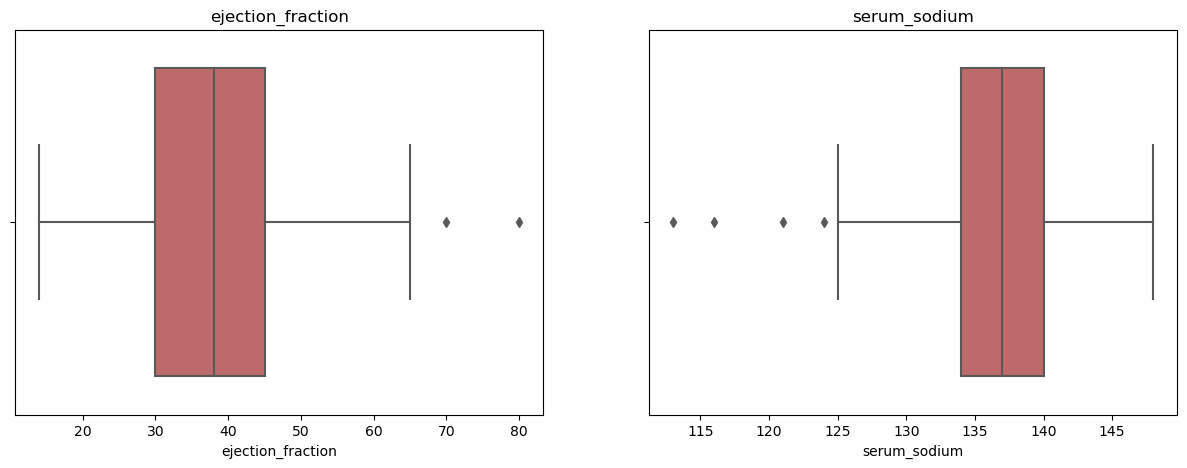

In [12]:
cols = df.loc[:,['ejection_fraction', 'serum_sodium']]
    
plt.figure(figsize=(15,5))

for i, col in enumerate(cols):
    plt.subplot(1, 2, i+1)
    plt.subplots_adjust(hspace =.3, wspace=.2)
    plt.title(col)
    sns.boxplot(x = df[col], color = 'indianred')

**Menghitung nilai kuartil**

In [13]:
# Menghitung kuartil 1 (Q1) 
Q1 = df['ejection_fraction'].quantile(0.25) 
# Menghitung kuartil 3 (Q3) 
Q3 = df['ejection_fraction'].quantile(0.75) 
# Menghitung rentang antarkuartil (IQR) 
IQR = Q3-Q1
print("Nilai Kuartil 1 :", Q1)
print("Nilai Kuartil 3 :", Q3)
print("Nilai Rentang :", IQR)

Nilai Kuartil 1 : 30.0
Nilai Kuartil 3 : 45.0
Nilai Rentang : 15.0


In [14]:
df[df['ejection_fraction'] > (Q3 + (1.5 * IQR))]

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
64    45        0                       582         0                 80   
217   54        1                       427         0                 70   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
64                     0  263358.03              1.18           137    0   
217                    1  151000.00              9.00           137    0   

     smoking  time  DEATH_EVENT  
64         0    63            0  
217        0   196            1

In [15]:
# Menghitung kuartil 1 (Q1) 
Q1a = df['serum_sodium'].quantile(0.25) 
# Menghitung kuartil 3 (Q3) 
Q3a = df['serum_sodium'].quantile(0.75) 
# Menghitung rentang antarkuartil (IQR) 
IQRa = Q3a-Q1a
print("Nilai Kuartil 1 :", Q1a)
print("Nilai Kuartil 3 :", Q3a)
print("Nilai Rentang :", IQRa)

Nilai Kuartil 1 : 134.0
Nilai Kuartil 3 : 140.0
Nilai Rentang : 6.0


In [16]:
df[df['serum_sodium'] < (Q1a - (1.5 * IQRa))]

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
4     65        1                       160         1                 20   
19    48        1                       582         1                 55   
126   46        0                       168         1                 17   
199   60        0                      1211         1                 35   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
4                      0  327000.00               2.7           116    0   
19                     0   87000.00               1.9           121    0   
126                    1  271000.00               2.1           124    0   
199                    0  263358.03               1.8           113    1   

     smoking  time  DEATH_EVENT  
4          0     8            1  
19         0    15            1  
126        0   100            1  
199        1   186            0

In [17]:
print('Data sebelum di hilangkan outliernya :', df.shape)
df = df[~((df['ejection_fraction'] > (Q3 + (1.5 * IQR))))]
df = df[~((df['serum_sodium'] < (Q1a - (1.5 * IQRa))))]
print('Data sesudah dihilangkan outliernya :', df.shape)

Data sebelum di hilangkan outliernya : (299, 13)
Data sesudah dihilangkan outliernya : (293, 13)


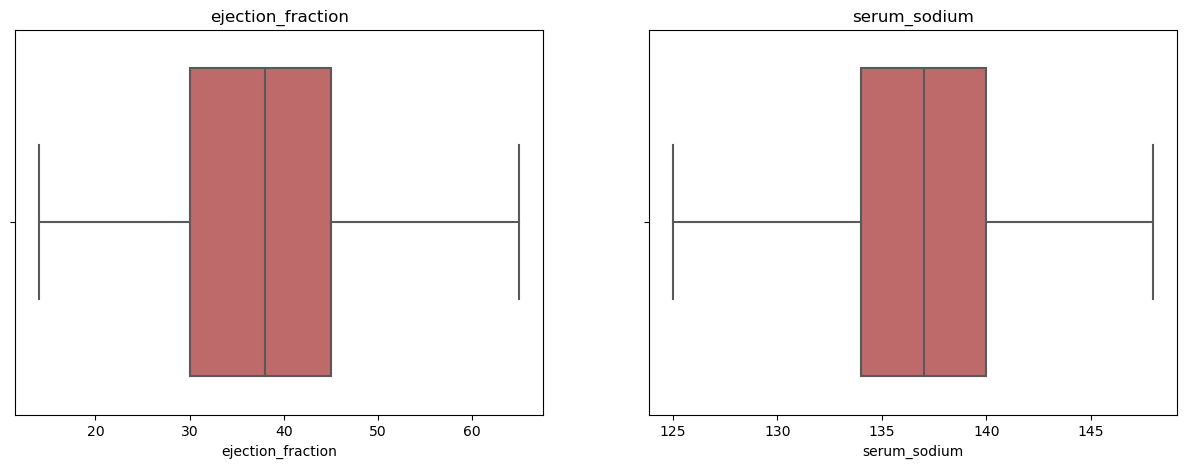

In [18]:
cols = df.loc[:,['ejection_fraction', 'serum_sodium']]
    
plt.figure(figsize=(15,5))

for i, col in enumerate(cols):
    plt.subplot(1, 2, i+1)
    plt.subplots_adjust(hspace =.3, wspace=.2)
    plt.title(col)
    sns.boxplot(x = df[col], color = 'indianred')

## D.4. Fitur numerik dan categorikal

In [19]:
df = df.reset_index(drop=True)
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   75        0                       582         0                 20   
1   55        0                      7861         0                 38   
2   65        0                       146         0                 20   
3   50        1                       111         0                 20   
4   90        1                        47         0                 40   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    1  204000.00               2.1           132    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        1     8            1

In [20]:
df_fitur = df.copy()

In [21]:
categorical = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
numerik = [value for value in list(df_fitur.columns) if value not in categorical and value != 'DEATH_EVENT']
print('Categorical features :\n', categorical)
print('\nNumerical features :\n', numerik)

Categorical features :
 ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

Numerical features :
 ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


In [22]:
swapper={0:'No',1:'Yes'}
for col in categorical:
    if col!='sex':
        for i in range(293):
            df_fitur.loc[i,col]=swapper[df_fitur.loc[i,col]]

In [23]:
for i in range(293):
    if df_fitur.loc[i,'sex']==0:
        df_fitur.loc[i,'sex'] = 'Female'
    else:
        df_fitur.loc[i,'sex'] = 'Male'

Setelah dilakukan data preprocessing maka dapat diketahui bahwa dataset tidak memiliki missing value dan data duplikat.  Tipe data pada kolom age yang awalnya float sudah diubah menjadi int. Dataset memiliki 7 fitur numerik dan 5 fitur kategorikal (tidak termasuk kolom DEATH_EVENT) yang sudah di encode sehingga lebih mudah untuk dilakukan proses selanjutnya. Tampaknya juga tidak ada nilai numerik dengan angka nol yang tidak disengaja.

# E. Exploratory Data Analysis
Exploratory Data Analysis (EDA) merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan. Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

## E.2. Visualisasi Data
### 1. Bagaimana persentase pasien yang bertahan hidup dan tidak berdasarkan gender?

In [24]:
male = df[df["sex"]==1]
female = df[df["sex"]==0]

male_survived = male[df["DEATH_EVENT"]==0]
male_not = male[df["DEATH_EVENT"]==1]
female_survived = female[df["DEATH_EVENT"]==0]
female_not = female[df["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male_survived),len(male_not),
         len(female_survived),len(female_not)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="Analysis on Survival based on Gender", )
fig.show()

**Kesimpulan:** <br>
Berdasarkan visualisasi, dapat dilihat bahwa:
- Pasien dengan jenis kelamin laki-laki yang mampu bertahan hidup memiliki persentase paling tinggi dengan nilai 44.7% dan berjumlah 131 data
- Pasien dengan jenis kelamin perempuan yang mampu bertahan hidup memiliki persentase 23.9% dan berjumlah 70 data
- Pasien dengan jenis kelamin laki-laki yang tidak mampu bertahan hidup memiliki persentase 21.2% dan berjumlah 62 data
- Pasien dengan jenis kelamin perempuan yang tidak mampu bertahan hidup memiliki persentase paling rendah dengan nilai 10.2% dan berjumlah 30 data

### 2. Bagaimana distribusi pada fitur categorikal?

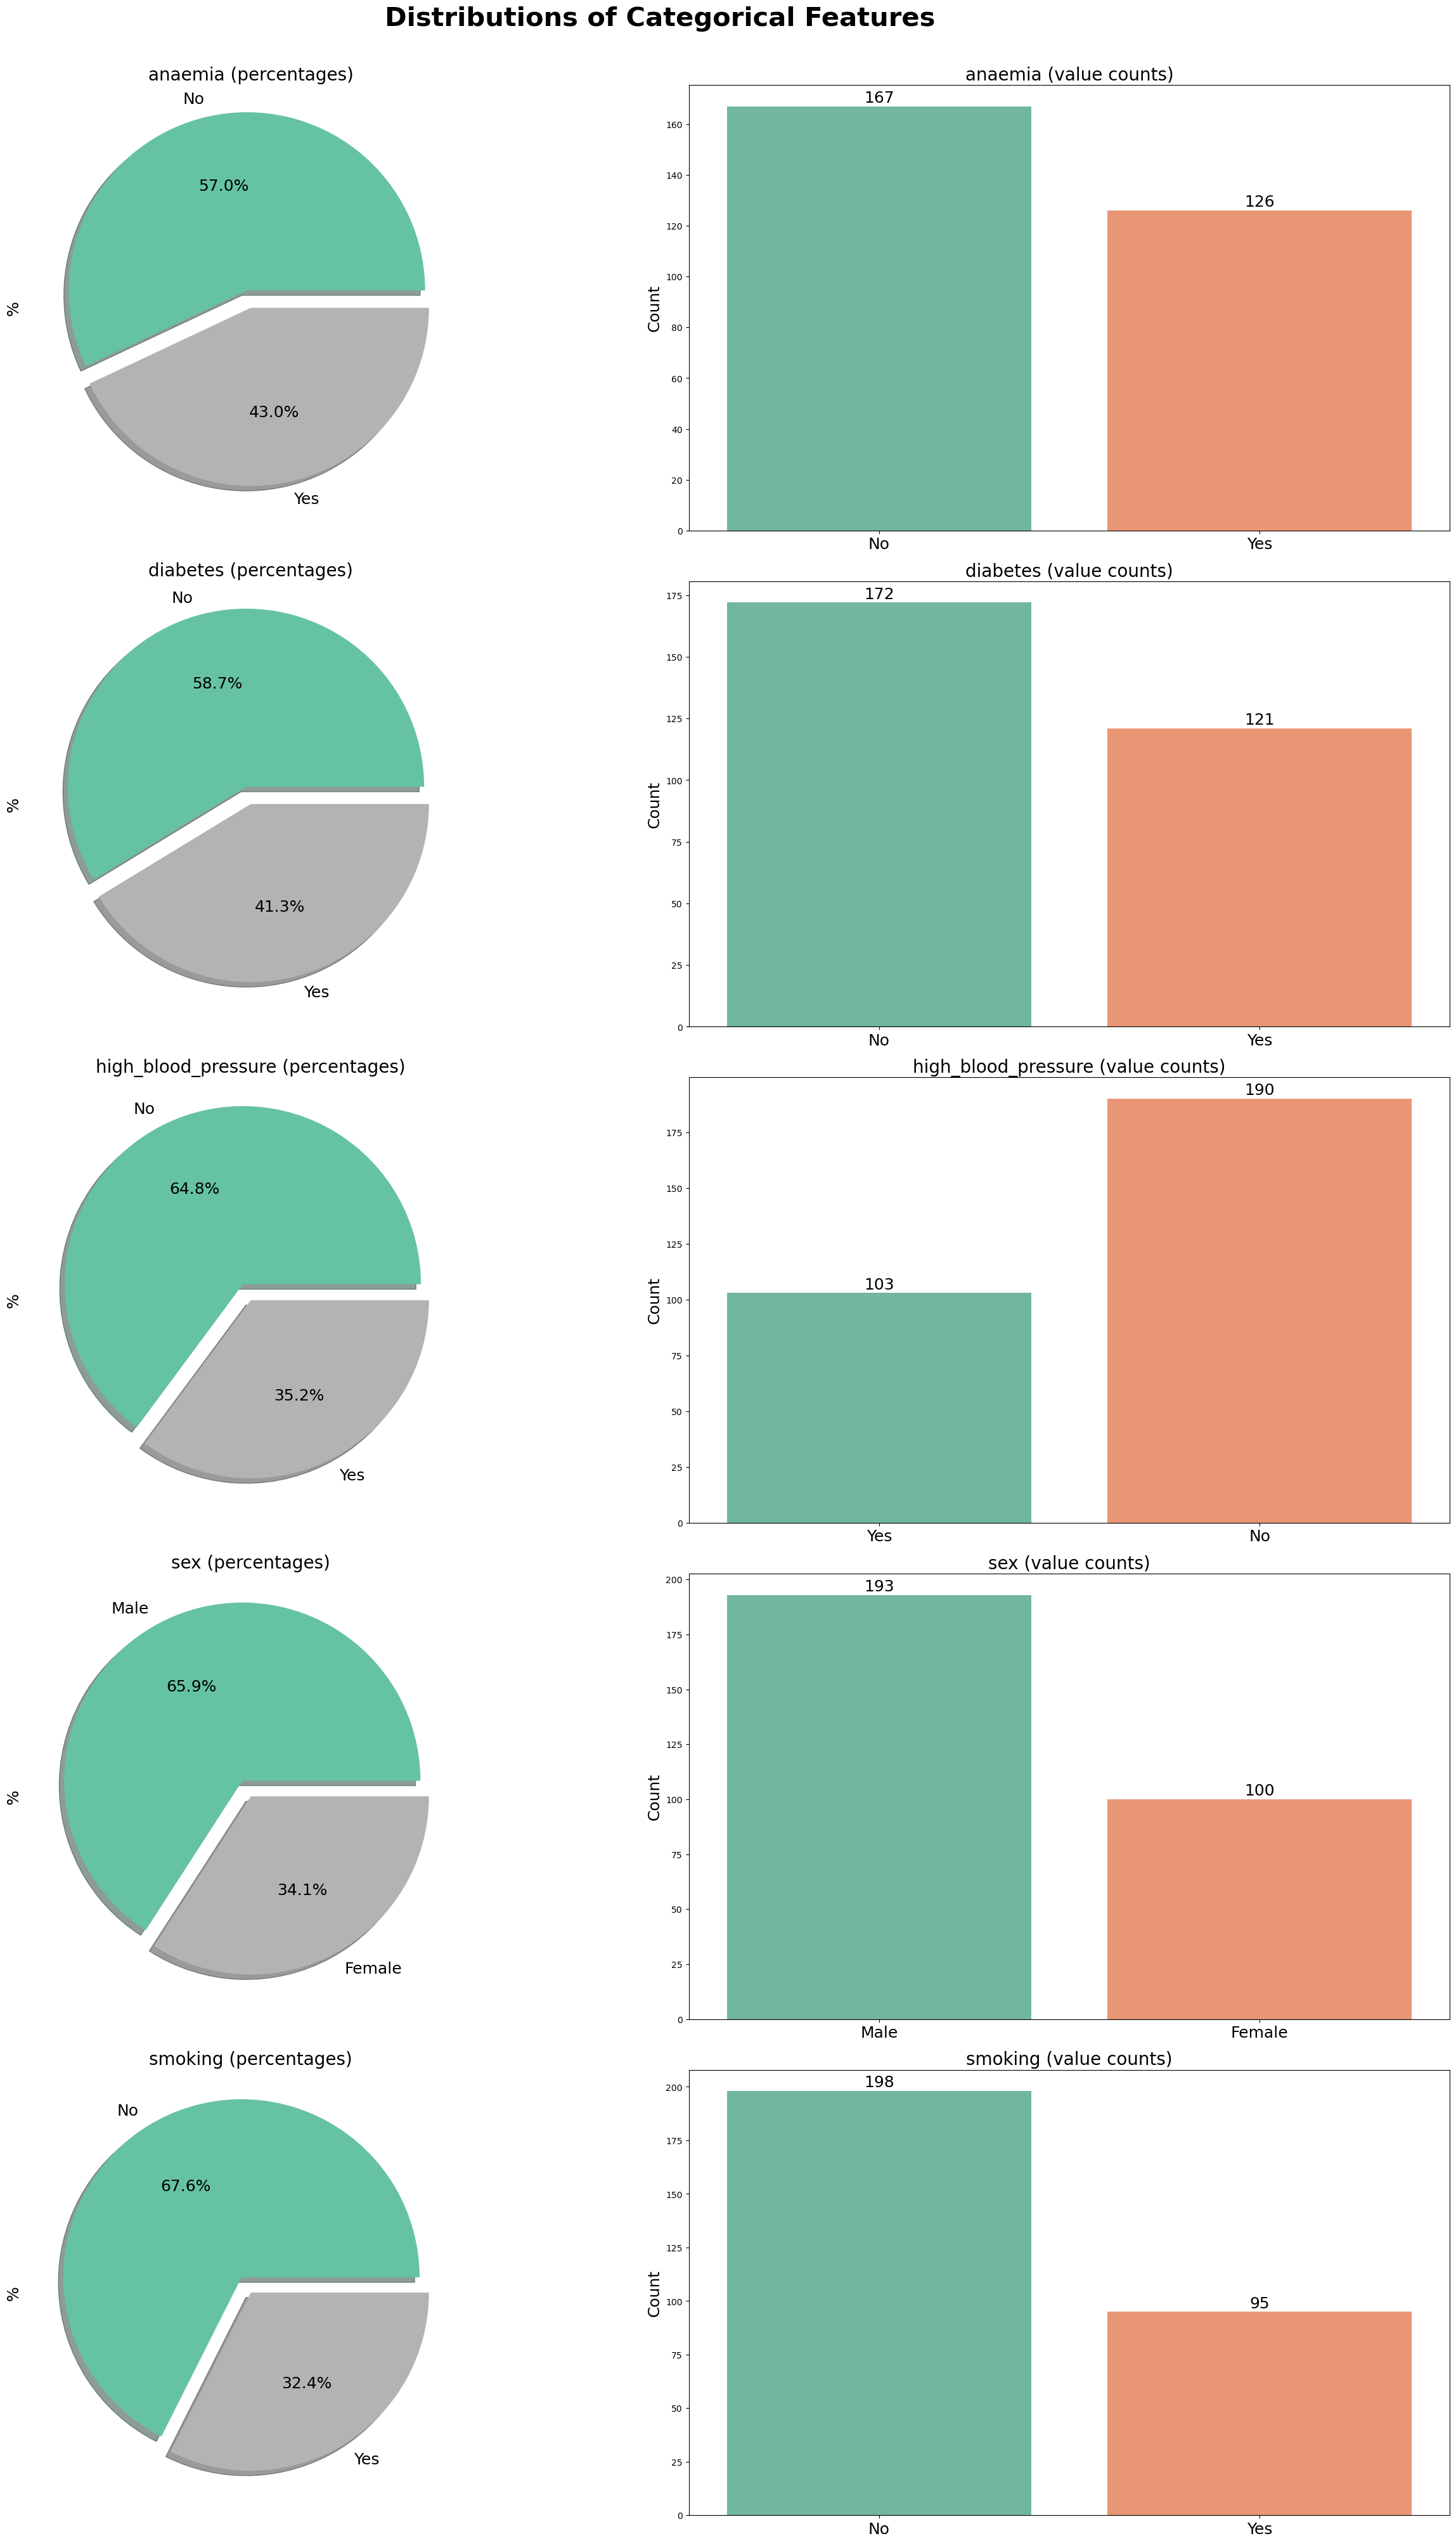

In [25]:
figure, axes = plt.subplots(5, 2, figsize=(25, 40), constrained_layout=True)
figure.suptitle('Distributions of Categorical Features\n', fontsize=30, fontweight='bold')

for i in range(len(categorical)):
    column=categorical[i]
    graph1=df_fitur[column].value_counts().plot.pie(autopct='%1.1f%%', 
                                                    ax=axes[i,0],
                                                    colormap="Set2",
                                                    fontsize=18,
                                                    shadow=True,
                                                    explode=[0.1,0])
    axes[i,0].set_ylabel('%',fontsize=18)
    axes[i,0].set_title(column+' (percentages)', fontsize=20)
    graph2=sns.countplot(x=column,
                         data=df_fitur,
                         palette='Set2',
                         ax=axes[i,1])
    axes[i,1].set_xlabel(None)
    axes[i,1].set_ylabel('Count',fontsize=18)
    axes[i,1].set_xticklabels(axes[i,1].get_xticklabels(), fontsize=18)
    axes[i,1].set_title(column +' (value counts)', fontsize=20)
    for c in graph2.containers:
        graph2.bar_label(c, fmt='%.0f', label_type='edge', padding=1, fontsize=18)

**Kesimpulan:**<br>
Berdasarkan visualisasi diatas, dapat disimpulkan bahwa:
- Pasien gagal jantung yang juga menderita anaemia yaitu 43% dan berjumlah 126, sedangkan yang tidak menderita anaemia yaitu 57% dan berjumlah 167
- Pasien gagal jantung yang juga menderita diabetes yaitu 41.3% dan berjumlah 121, sedangkan yang tidak menderita diabetes yaitu 58.7% dan berjumlah 172
- Pasien gagal jantung yang memiliki darah tinggi yaitu 35.2% dan berjumlah 103, sedangkan yang tidak memiliki darah tinggi yaitu 64.8% dan berjumlah 190
- Pasien gagal jantung yang berjenis kelamin laki-laki yaitu 65.9% dan berjumlah 193, sedangkan yang berjenis kelamin perempuan yaitu 34.1% dan berjumlah 100
- Pasien gagal jantung yang merokok yaitu 32.4% dan berjumlah 95, sedangkan yang tidak merokok yaitu 67.6% dan berjumlah 198

### 3. Bagaimana distribusi pada fitur numerik?

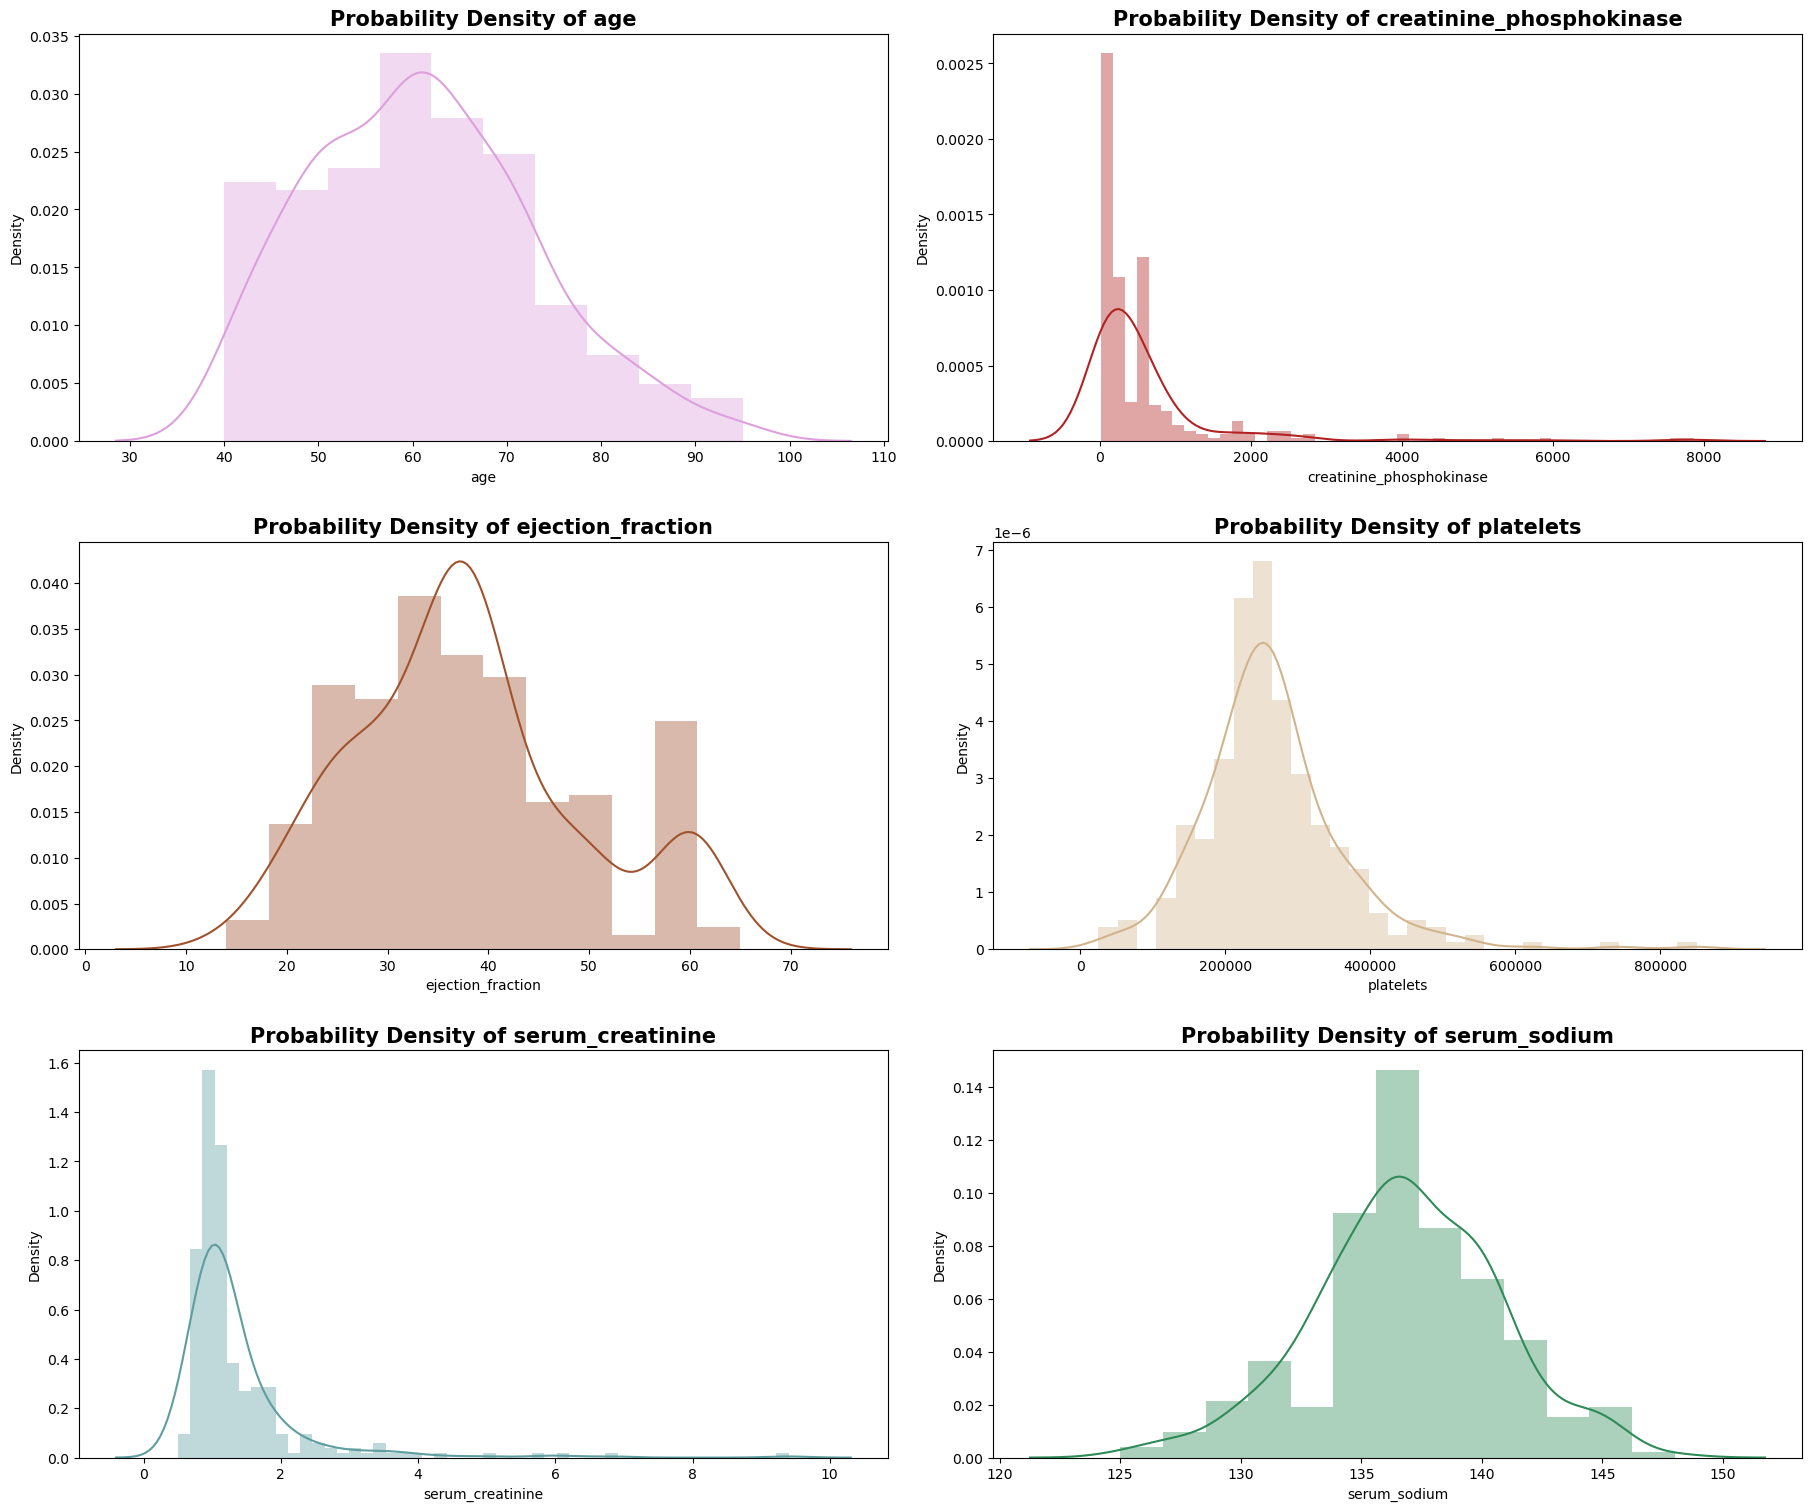

In [26]:
fig, ax = plt.subplots(3,2, figsize=(18,15), constrained_layout=True)

# age
sns.distplot(df_fitur['age'], ax=ax[0,0], color='plum')
ax[0,0].set_title("Probability Density of age", fontsize=15, fontweight='bold')

# creatinine_phosphokinase
sns.distplot(df_fitur['creatinine_phosphokinase'], ax=ax[0,1], color='firebrick')
ax[0,1].set_title("Probability Density of creatinine_phosphokinase", fontsize=15, fontweight='bold')

# ejection_fraction
sns.distplot(df_fitur['ejection_fraction'], ax=ax[1,0], color='sienna')
ax[1,0].set_title("\nProbability Density of ejection_fraction", fontsize=15, fontweight='bold')

# platelets
sns.distplot(df_fitur['platelets'], ax=ax[1,1], color='tan')
ax[1,1].set_title("\nProbability Density of platelets", fontsize=15, fontweight='bold')

# serum_creatinine
sns.distplot(df_fitur['serum_creatinine'], ax=ax[2,0], color='cadetblue')
ax[2,0].set_title("\nProbability Density of serum_creatinine", fontsize=15, fontweight='bold')

# serum_sodium
sns.distplot(df_fitur['serum_sodium'], ax=ax[2,1], color='seagreen')
ax[2,1].set_title("\nProbability Density of serum_sodium", fontsize=15, fontweight='bold');

**Kesimpulan:** <br>
Berdasarkan visualisasi diatas, dapat disimpulkan bahwa:
- `age` : tidak berdistribusi normal karena terdapat banyak puncak dalam grafik distribusi variabel 'age' dan sebagian besar terdistribusi sebagai nilai antara 60-65, 65-70, dan 70-75
- `creatinine_phosphokinase` : tidak berdistribusi normal karena data condong ke kiri (positively skewed)
- `ejection_fraction` : tidak berdistribusi normal karena data condong ke kiri (positively skewed) dan terdapat data yang kosong antara nilai 40-45
- `platelets` : berdistribusi normal karena grafik tidak memiliki banyak puncak, kemiringan dan kurtosis rendah serta sebagian besar terdistribusi antara 200000 dan 400000
- `serum_creatinine` : tidak berdistribusi normal karena data condong ke kiri (positively skewed)
- `serum_sodium` : tidak berdistribusi normal karena data condong ke kanan (negatively skewed)

### 4. Berapa pasien penderita diabetes terbanyak berdasarkan usia dan gender? 

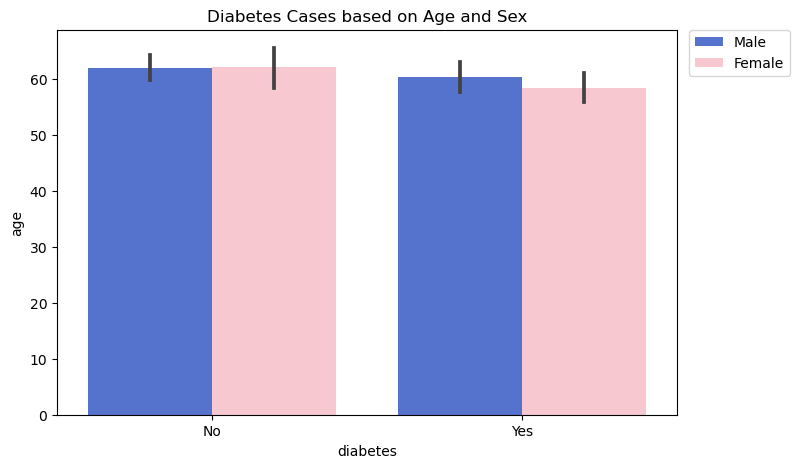

In [27]:
plt.figure(figsize=(8,5))

ax = sns.barplot(x = 'diabetes', y = 'age', hue = 'sex', 
            data = df_fitur, palette = ['royalblue', 'pink']).set(title = "Diabetes Cases based on Age and Sex");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

**Kesimpulan:**

Berdasarkan visualisasi diatas, dapat diketahui bahwa pasien penderita diabetes terbanyak berdasarkan usia dan gender yaitu pada pasien laki-laki yang berusia 60 tahun. Selain itu, pasien perempuan penderita diabetes terbanyak berusia sekitar 58 tahun.

### 5. Bagaimana perbandingan waktu untuk follow-up dengan kematian pasien?

In [28]:
fig = px.histogram(df, x="time", color="DEATH_EVENT", marginal="box", hover_data=df.columns)
fig.show()

**Kesimpulan:**<br> 
Berdasarkan visualisasi diatas, maka dapat diketahui bahwa:
- Pasien meninggal terbanyak selama masa follow-up yaitu pada hari ke 20-39 dengan total kasus 22 kematian
- Pasien meninggal paling sedikit selama masa follow-up yaitu pada hari ke 220-239 dan 240-259 dengan total kasus 1 kematian
- Masa follow-up pada hari ke 80-99 terdapat pasien berhasil bertahan hidup paling banyak dengan total 30 kasus 
- Masa follow-up pada hari ke 280-299 terdapat pasien berhasil bertahan hidup paling sedikit dengan total 2 kasus 

### 6. Pada pasien berusia berapa terdapat kasus penderita anaemia paling banyak?

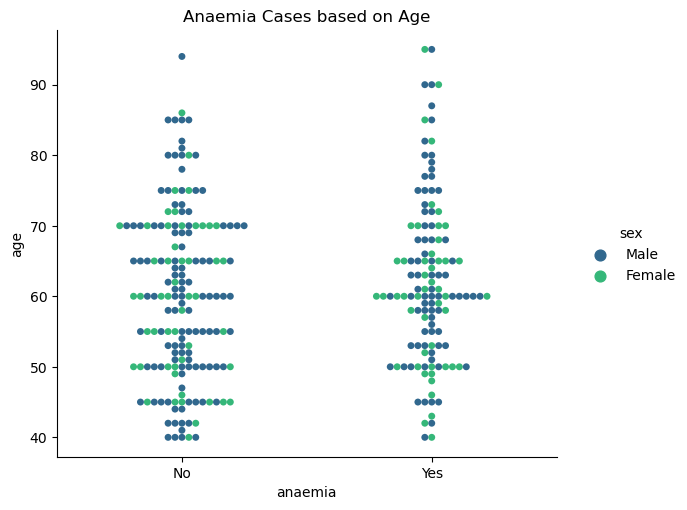

In [29]:
sns.catplot(x = 'anaemia', y = 'age', hue='sex',
            data = df_fitur,
            kind = 'swarm', height = 5, aspect = 1.2, palette = 'viridis', 
            margin_titles = True).set(title = "Anaemia Cases based on Age");

**Kesimpulan:**

Berdasarkan visualisasi data diatas, maka dapat disimpulkan bahwa:
- Penderita anaemia terbanyak yaitu pada pasien berusia 60 tahun dengan total 17 kasus (7 pasien perempuan dan 10 pasien laki-laki)
- Pasien yang berusia 70 tahun sebagian besar tidak menderita kasus anaemia

### 7. Bagaimana hubungan antara categorikal feature dengan kematian pasien?

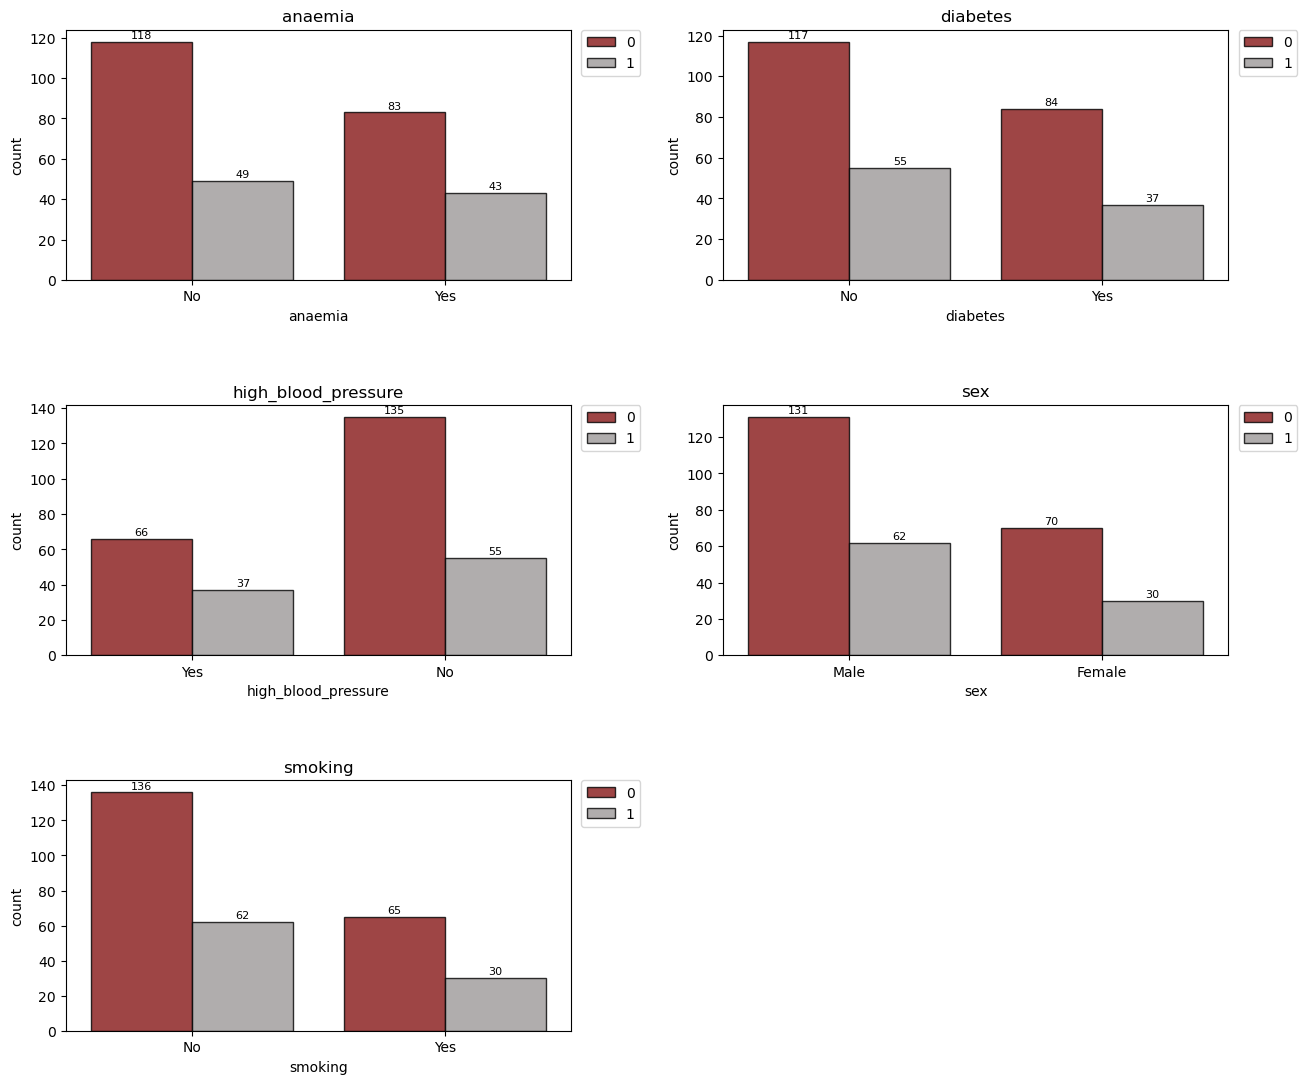

In [30]:
plt.figure(figsize=(15, 13))

for i, col in enumerate(categorical):
    plt.subplot(3, 2, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    bar = sns.countplot(data=df_fitur, x=col, hue="DEATH_EVENT", 
                        palette = ["#990303", "#9C9999"], 
                        alpha=0.8, edgecolor="k", linewidth=1)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
    for a in bar.containers:
        bar.bar_label(a, fmt='%.0f', label_type='edge', padding=1, fontsize=8)

**Kesimpulan:**<br> 
Berdasarkan visualisasi diatas, maka dapat diketahui bahwa:
- Kasus kematian pada pasien yang menderita anaemia yaitu 43 kasus, sedangkan pada pasien yang tidak menderita anaemia yaitu 49 kasus. Artinya penderita anaemia belum tentu menjadi penyebab kematian pada pasien gagal jantung
- Kasus kematian pada pasien yang menderita diabetes yaitu 37 kasus, sedangkan pada pasien yang tidak menderita diabetes yaitu 55 kasus. Artinya penderita diabetes belum tentu menjadi penyebab kematian pada pasien gagal jantung
- Kasus kematian pada pasien yang menderita darah tinggi yaitu 37 kasus, sedangkan pada pasien yang tidak menderita darah tinggi yaitu 55 kasus. Artinya penderita darah tinggi belum tentu menjadi penyebab kematian pada pasien gagal jantung
- Pasien berjenis kelamin laki-laki lebih banyak tingkat kematiannya. Kasus kematian pada pasien dengan jenis kelamin laki-laki yaitu 62 kasus, sedangkan pada pasien dengan jenis kelamin perempuan yaitu 30 kasus
- Kasus kematian pada pasien yang merokok yaitu 30 kasus, sedangkan pada pasien yang tidak merokok yaitu 62 kasus. Artinya perokok belum tentu menjadi penyebab kematian pada pasien gagal jantung

## E.3. Analisis Korelasi
Analisis korelasi merupakan salah satu teknik statistik yang digunakan untuk menganalisis hubungan antara dua variabel atau lebih yang bersifat kuantitatif. Bahwa adanya perubahan sebuah variabel disebabkan atau akan diikuti dengan perubahan variabel lain.

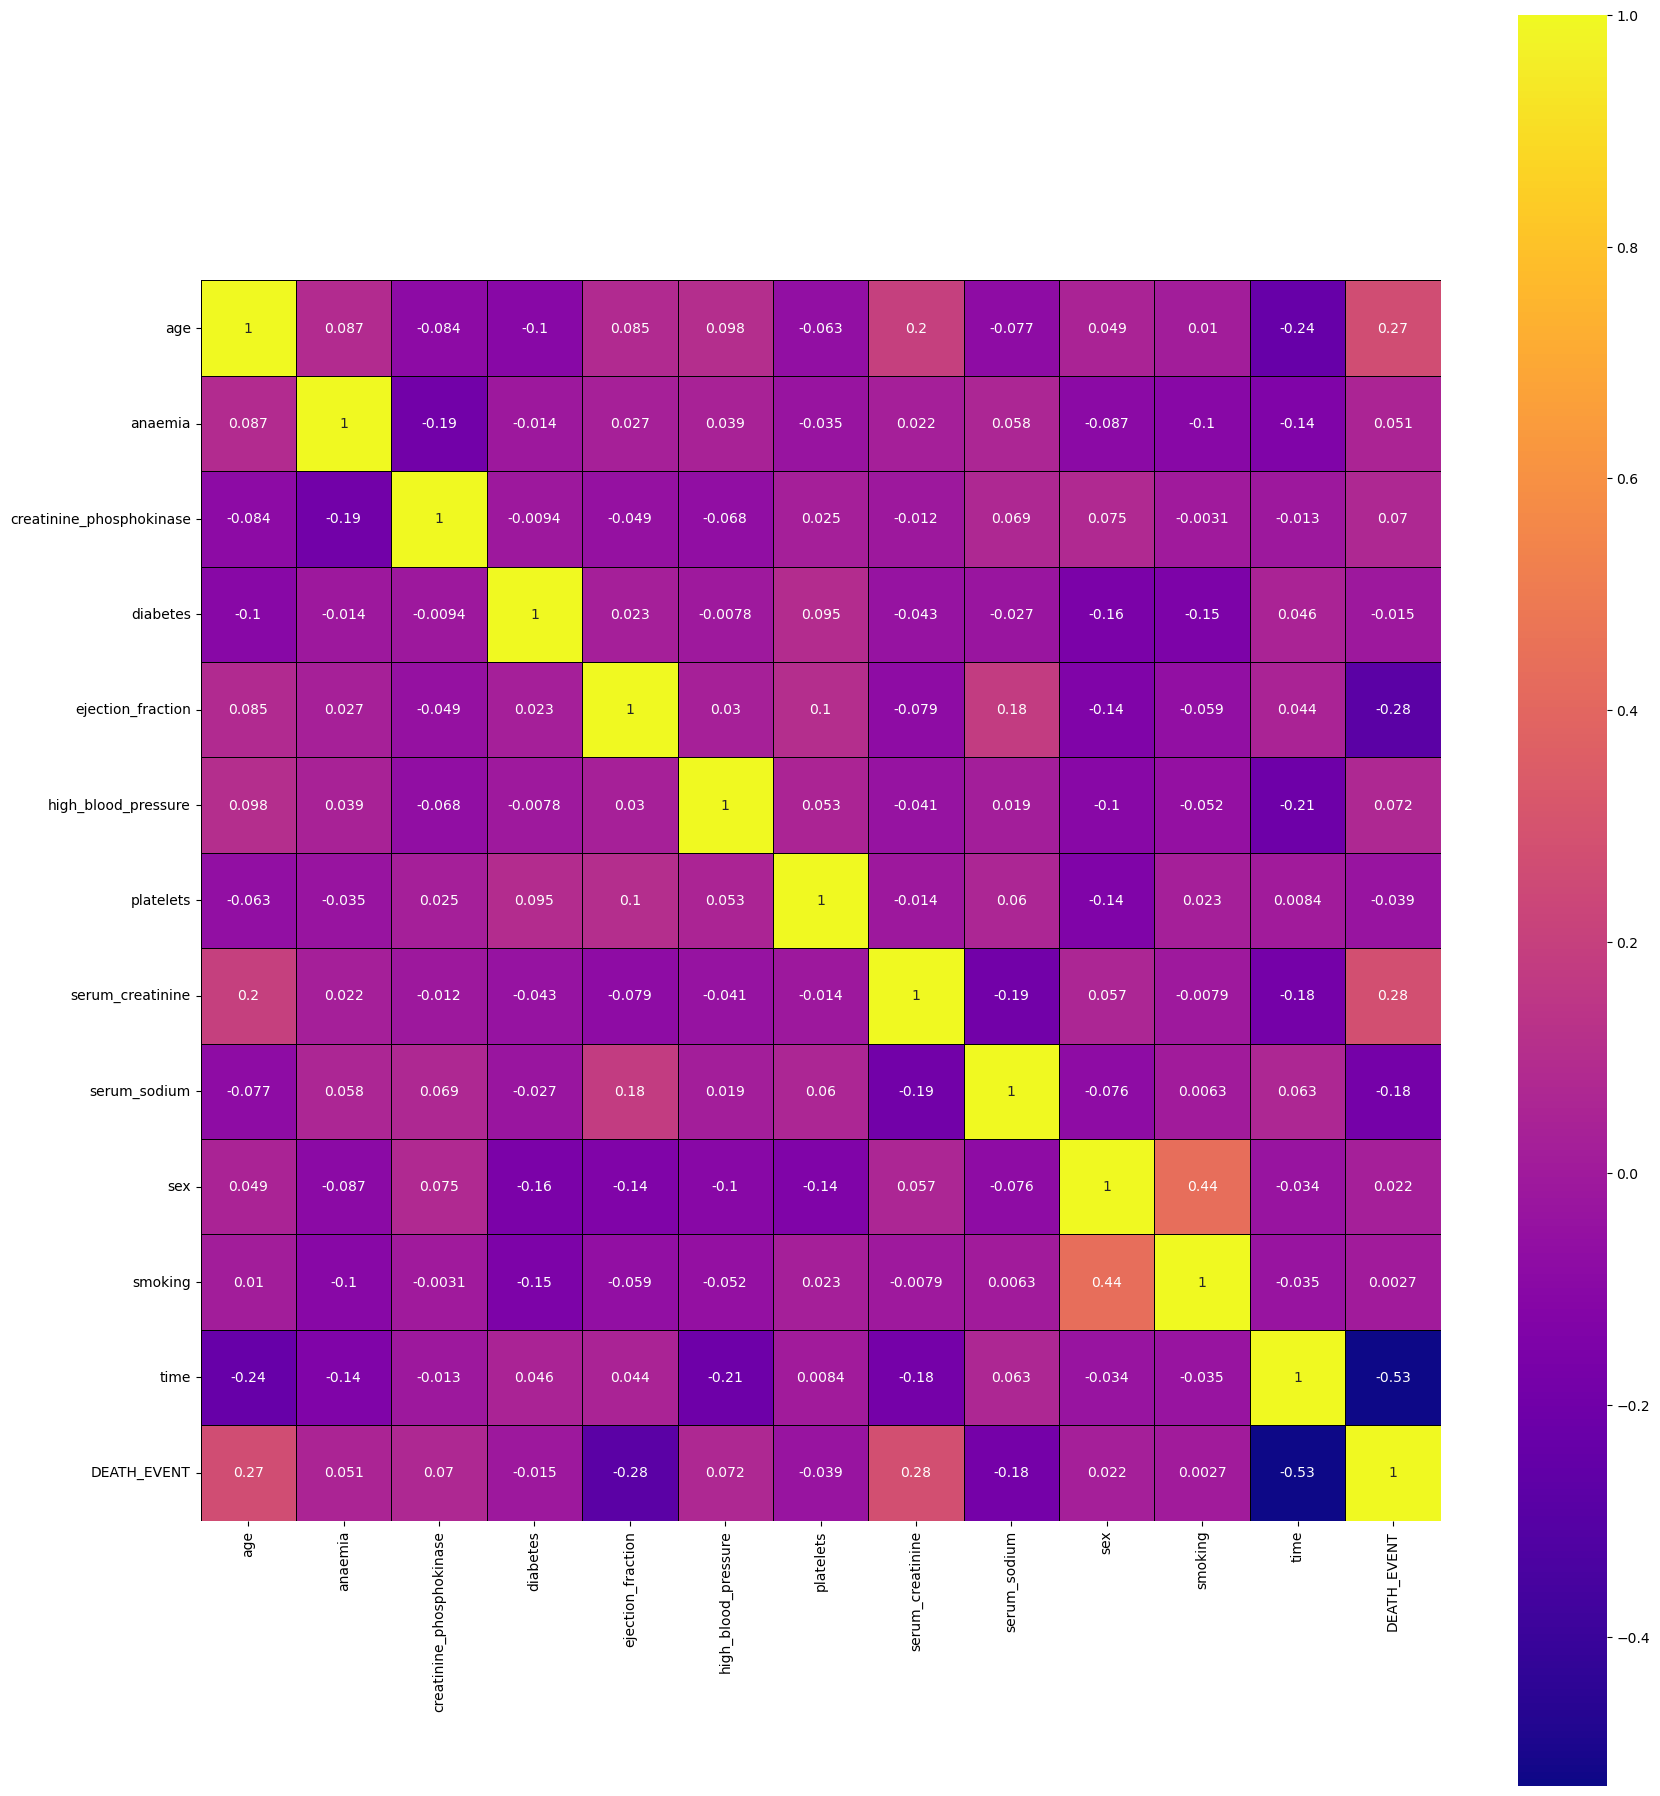

In [31]:
plt.figure(figsize=(20,23)) 
    
# Membuat heatmap dengan menampilkan nilai dari korelasi
sns.heatmap(df.corr(), 
            annot=True, 
            cmap="plasma", 
            linewidths=.5, 
            linecolor='black', 
            square=True); 

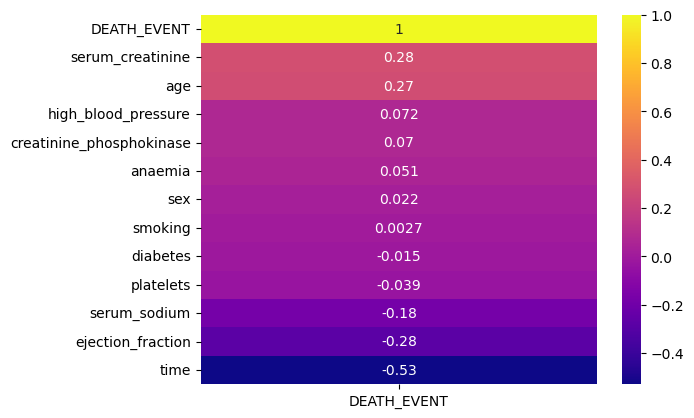

In [32]:
corr = df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False)
sns.heatmap(corr, annot=True, cmap="plasma");

**Keterangan:** <br>
Berdasarkan visualisasi heatmap diatas, dipilih beberapa kolom yang memiliki korelasi cukup tinggi dengan kolom `DEATH_EVENT` yang kemudian nantinya digunakan untuk variabel X pada modelling. Kolom tersebut diantaranya adalah sebagai berikut:
1. `serum_creatinine`, dengan korelasi sebesar 0.29
2. `age`, dengan korelasi sebesar 0.25
3. `high_blood_pressure`, dengan korelasi sebesar 0.079
4. `anaemia`, dengan korelasi sebesar 0.066
5. `creatinine_phosphokinase`, dengan korelasi sebesar 0.063
6. `diabetes`, dengan korelasi sebesar -0.0019
7. `sex`, dengan korelasi sebesar -0.0043
8. `smoking`, dengan korelasi sebesar -0.013
9. `platelets`, dengan korelasi sebesar -0.049

# F. Mencari Central Tendency & Measure of Spread 
1. Central Tendency merupakan nilai yang menunjukkan titik tengah dari suatu dataset untuk mengetahui dimana posisi banyak nilai data berkumpul di dalam distribusi. Nilai Mean, Median, dan Modus adalah ukuran Central Tendency yang paling umum digunakan. 
2. Measures of Spread didefinisikan sebagai cara untuk mendeskripsikan data dengan menjelaskan seberapa menyebar data kita. Cara yang sering digunakan adalah range, varian, dan standar deviasi.

Pada project ini, kami menggunakan kolom yang sudah dipilih dengan tipe data integer untuk dicari central tendency dan Measure of Spread nya.

In [33]:
df_central = df_fitur.loc[:,['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]
df_central.head()

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0   75                       582                 20  265000.00   
1   55                      7861                 38  263358.03   
2   65                       146                 20  162000.00   
3   50                       111                 20  210000.00   
4   90                        47                 40  204000.00   

   serum_creatinine  serum_sodium  time  
0               1.9           130     4  
1               1.1           136     6  
2               1.3           129     7  
3               1.9           137     7  
4               2.1           132     8

In [34]:
#Menghitung mean, median, modus, range, variansi, dan Standard Deviasi
for column in df_central:
    mean = df_central[column].mean()
    median = df_central[column].median()
    mode = df_central[column].mode()[0]
    min_value = df_central[column].min()
    max_value = df_central[column].max()
    range_value = max_value - min_value
    variance = df_central[column].var()
    std_dev = df_central[column].std()
    
#Print hasilnya
    print(f"Nama Kolom: {column}")
    print(f"Mean: {mean:.3f}")
    print(f"Median: {median:.3f}")
    print(f"Modus: {mode:.3f}")
    print(f"Range: {range_value:.3f}")
    print(f"Variansi: {variance:.3f}")
    print(f"Standard Deviasi: {std_dev:.3f}")
    print("  ")

Nama Kolom: age
Mean: 60.997
Median: 60.000
Modus: 60.000
Range: 55.000
Variansi: 141.969
Standard Deviasi: 11.915
  
Nama Kolom: creatinine_phosphokinase
Mean: 583.072
Median: 249.000
Modus: 582.000
Range: 7838.000
Variansi: 958168.423
Standard Deviasi: 978.861
  
Nama Kolom: ejection_fraction
Mean: 37.918
Median: 38.000
Modus: 35.000
Range: 51.000
Variansi: 129.754
Standard Deviasi: 11.391
  
Nama Kolom: platelets
Mean: 264100.118
Median: 262000.000
Modus: 263358.030
Range: 824900.000
Variansi: 9597851890.219
Standard Deviasi: 97968.627
  
Nama Kolom: serum_creatinine
Mean: 1.359
Median: 1.100
Modus: 1.000
Range: 8.900
Variansi: 0.884
Standard Deviasi: 0.940
  
Nama Kolom: serum_sodium
Mean: 136.870
Median: 137.000
Modus: 136.000
Range: 23.000
Variansi: 15.058
Standard Deviasi: 3.881
  
Nama Kolom: time
Mean: 130.990
Median: 115.000
Modus: 187.000
Range: 281.000
Variansi: 6006.455
Standard Deviasi: 77.501
  


# G. Cardinality
Cardinality / Kardinalitas adalah ukuran keunikan data pada kolom tertentu dari suatu table database. Tujuan kita adalah mengurangi cardinality untuk membuat model yang lebih konsisten dan tidak over-fit. Kita memastikan semua label unik yang ada pernah dilihat model saat training.

In [35]:
df_card = df.loc[:,['serum_creatinine', 'age', 'high_blood_pressure', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'sex', 'smoking', 'platelets', 'DEATH_EVENT']]
df_card.head()

serum_creatinine  age  high_blood_pressure  anaemia  \
0               1.9   75                    1        0   
1               1.1   55                    0        0   
2               1.3   65                    0        0   
3               1.9   50                    0        1   
4               2.1   90                    1        1   

   creatinine_phosphokinase  diabetes  sex  smoking  platelets  DEATH_EVENT  
0                       582         0    1        0  265000.00            1  
1                      7861         0    1        0  263358.03            1  
2                       146         0    1        1  162000.00            1  
3                       111         0    1        0  210000.00            1  
4                        47         0    1        1  204000.00            1

In [36]:
print('Number of categories in the variable serum_creatinine         : {}'.format(len(df.serum_creatinine.unique())))
print('Number of categories in the variable age                      : {}'.format(len(df.age.unique())))
print('Number of categories in the variable high_blood_pressure      : {}'.format(len(df.high_blood_pressure.unique())))
print('Number of categories in the variable anaemia                  : {}'.format(len(df.anaemia.unique())))
print('Number of categories in the variable creatinine_phosphokinase : {}'.format(len(df.creatinine_phosphokinase.unique())))
print('Number of categories in the variable diabetes                 : {}'.format(len(df.diabetes.unique())))
print('Number of categories in the variable sex                      : {}'.format(len(df.sex.unique())))
print('Number of categories in the variable smoking                  : {}'.format(len(df.smoking.unique())))
print('Number of categories in the variable platelets                : {}'.format(len(df.platelets.unique())))
print('Number of categories in the variable DEATH_EVENT              : {}'.format(len(df.DEATH_EVENT.unique())))

Number of categories in the variable serum_creatinine         : 39
Number of categories in the variable age                      : 46
Number of categories in the variable high_blood_pressure      : 2
Number of categories in the variable anaemia                  : 2
Number of categories in the variable creatinine_phosphokinase : 205
Number of categories in the variable diabetes                 : 2
Number of categories in the variable sex                      : 2
Number of categories in the variable smoking                  : 2
Number of categories in the variable platelets                : 174
Number of categories in the variable DEATH_EVENT              : 2


**Keterangan:**

Dapat dilihat bahwa number of categories (unique value) dari creatinine_phosphokinase dan platelets sangat banyak atau biasa disebut dengan istilah high cardinality. Namun, dikarenakan creatinine_phosphokinase merupakan level enzim CPK dalam mcg/L dan platelets merupakan jumlah platelet di darah dalam kiloplatelets/mL maka tidak dapat dilakukan reduced cardinality walaupun termasuk kedalam high cardinality.

# H. One Hot Encoding

In [37]:
def one_hot_encoder(data, feature, keep_first=True):
    # Melakukan one-hot encoding pada fitur yang diberikan
    one_hot_cols = pd.get_dummies(data[feature])
    
    # Mengganti nama setiap kolom dalam DataFrame one_hot_cols
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col}, axis=1, inplace=True)
    
    # Menggabungkan DataFrame one_hot_cols dengan dataset data
    new_data = pd.concat([data, one_hot_cols], axis=1)
    # Menghapus fitur yang telah diencode
    new_data.drop(feature, axis=1, inplace=True)
    
    # Jika keep_first di set sebagai False, maka fitur pertama akan dihapus dari hasil encoding
    if keep_first == False:
        new_data = new_data.iloc[:, 1:]
    
    return new_data

In [38]:
# Melakukan copy dataframe df_fitur menjadi df_onehot
df_onehot = df_fitur.copy()

# Looping untuk setiap kolom yang memiliki tipe data object (string)
for col in df_onehot.select_dtypes(include='O').columns:
    # Menggunakan fungsi one_hot_encoder untuk melakukan one-hot encoding pada kolom tersebut
    df_onehot = one_hot_encoder(df_onehot, col)

# Menampilkan 5 baris pertama dari dataframe df_onehot
df_onehot.head()

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0   75                       582                 20  265000.00   
1   55                      7861                 38  263358.03   
2   65                       146                 20  162000.00   
3   50                       111                 20  210000.00   
4   90                        47                 40  204000.00   

   serum_creatinine  serum_sodium  time  DEATH_EVENT  anaemia_No  anaemia_Yes  \
0               1.9           130     4            1           1            0   
1               1.1           136     6            1           1            0   
2               1.3           129     7            1           1            0   
3               1.9           137     7            1           0            1   
4               2.1           132     8            1           0            1   

   diabetes_No  diabetes_Yes  high_blood_pressure_No  high_blood_pressure_Yes  \
0            1             0                       0                        1   
1            1             0                       1                        0   
2            1             0                       1                        0   
3            1             0                       1                        0   
4            1             0                       0                        1   

   sex_Female  sex_Male  smoking_No  smoking_Yes  
0           0         1           1            0  
1           0         1           1            0  
2           0         1           0            1  
3           0         1           1            0  
4           0         1           0            1

In [39]:
# Memindahkan kolom target ('DEATH_EVENT') ke akhir
target='DEATH_EVENT'
y=df_onehot[target].values
df_onehot.drop('DEATH_EVENT',axis=1,inplace=True)
df_onehot=pd.concat([df_onehot,df[target]],axis=1)
df_onehot.head()

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0   75                       582                 20  265000.00   
1   55                      7861                 38  263358.03   
2   65                       146                 20  162000.00   
3   50                       111                 20  210000.00   
4   90                        47                 40  204000.00   

   serum_creatinine  serum_sodium  time  anaemia_No  anaemia_Yes  diabetes_No  \
0               1.9           130     4           1            0            1   
1               1.1           136     6           1            0            1   
2               1.3           129     7           1            0            1   
3               1.9           137     7           0            1            1   
4               2.1           132     8           0            1            1   

   diabetes_Yes  high_blood_pressure_No  high_blood_pressure_Yes  sex_Female  \
0             0                       0                        1           0   
1             0                       1                        0           0   
2             0                       1                        0           0   
3             0                       1                        0           0   
4             0                       0                        1           0   

   sex_Male  smoking_No  smoking_Yes  DEATH_EVENT  
0         1           1            0            1  
1         1           1            0            1  
2         1           0            1            1  
3         1           1            0            1  
4         1           0            1            1

# I. Feature Scaling
Feature scaling adalah teknik untuk membuat skala data setiap fitur menjadi sama. Pada project ini, kami menggunakan MinMax Scaler yang melakukan transform feature dengan mengubah setiap data ke range tertentu antara 0-1.

In [40]:
# memisahkan variabel dependen dan independen pada data training dan testing
x = df_onehot.drop(['DEATH_EVENT'],axis=1)
y = df_onehot['DEATH_EVENT']

In [41]:
x = MinMaxScaler().fit_transform(x)

# J. Modelling
## J.1. Mendefinisikan model-model yang digunakan

In [42]:
rf_model = RandomForestClassifier(random_state=42)
et_model = ExtraTreesClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
svm_model = svm.SVC(kernel='linear')
lr_model = LogisticRegression(random_state=42)

## J.2. Pelatihan Model
Pelatihan model adalah proses untuk menjalankan sebuah algoritma machine learning untuk dapat mengolah dataset di dalamnya yang sudah terbagi menjadi data training dan mengoptimalkan algoritma untuk menemukan pola maupun output tertentu.

In [43]:
# Memisahkan data menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

x_train shape : (234, 17)
x_test shape : (59, 17)
y_train shape : (234,)
y_test shape : (59,)


## J.3. Menyimpan Data Modelling tanpa SMOTE
Membuat array accuracy_list untuk menyimpan daftar akurasi pada setiap model sebelum dilakukan SMOTE.

In [44]:
 accuracy_list = []

## J.4. Evaluasi model tanpa SMOTE (Synthetic Minority Over-sampling Technique)

### J.4.1. Random Forest Classifier

In [45]:
rf_model.fit(x_train, y_train)
rf_pred1 = rf_model.predict(x_test)

# evaluasi model
cm1 = confusion_matrix(y_test,rf_pred1)
print('Confusion Matrix : \n', cm1)

akurasi_1 = accuracy_score(y_test, rf_pred1)
accuracy_list.append(100*akurasi_1)
print("\nAkurasi Model :", akurasi_1, "\n")
print(classification_report(y_test,rf_pred1))

Confusion Matrix : 
 [[35  1]
 [ 7 16]]

Akurasi Model : 0.864406779661017 

              precision    recall  f1-score   support

           0       0.83      0.97      0.90        36
           1       0.94      0.70      0.80        23

    accuracy                           0.86        59
   macro avg       0.89      0.83      0.85        59
weighted avg       0.88      0.86      0.86        59



### J.4.2. Extra Trees Classifier

In [46]:
et_model.fit(x_train, y_train)
et_pred1 = et_model.predict(x_test)

# evaluasi model
cm2 = confusion_matrix(y_test,et_pred1)
print('Confusion Matrix : \n', cm2)

akurasi_2 = accuracy_score(y_test, et_pred1)
accuracy_list.append(100*akurasi_2)
print("\nAkurasi Model :", akurasi_2, "\n")
print(classification_report(y_test,et_pred1))

Confusion Matrix : 
 [[35  1]
 [14  9]]

Akurasi Model : 0.7457627118644068 

              precision    recall  f1-score   support

           0       0.71      0.97      0.82        36
           1       0.90      0.39      0.55        23

    accuracy                           0.75        59
   macro avg       0.81      0.68      0.68        59
weighted avg       0.79      0.75      0.72        59



### J.4.3. Gradient Boosting Classifier

In [47]:
gb_model.fit(x_train, y_train)
gb_pred1 = gb_model.predict(x_test)

# evaluasi model
cm3 = confusion_matrix(y_test,gb_pred1)
print('Confusion Matrix : \n', cm3)

akurasi_3 = accuracy_score(y_test, gb_pred1)
accuracy_list.append(100*akurasi_3)
print("\nAkurasi Model :", akurasi_3, "\n")
print(classification_report(y_test,gb_pred1))

Confusion Matrix : 
 [[32  4]
 [ 7 16]]

Akurasi Model : 0.8135593220338984 

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        36
           1       0.80      0.70      0.74        23

    accuracy                           0.81        59
   macro avg       0.81      0.79      0.80        59
weighted avg       0.81      0.81      0.81        59



### J.4.4. Support Vector Machine

In [48]:
svm_model.fit(x_train, y_train)
svm_pred1 = svm_model.predict(x_test)

# evaluasi model
cm4 = confusion_matrix(y_test,svm_pred1)
print('Confusion Matrix : \n', cm4)

akurasi_4 = accuracy_score(y_test, svm_pred1)
accuracy_list.append(100*akurasi_4)
print("\nAkurasi Model :", akurasi_4)
print(classification_report(y_test,svm_pred1))

Confusion Matrix : 
 [[34  2]
 [10 13]]

Akurasi Model : 0.7966101694915254
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        36
           1       0.87      0.57      0.68        23

    accuracy                           0.80        59
   macro avg       0.82      0.75      0.77        59
weighted avg       0.81      0.80      0.79        59



### J.4.5. Logistic Regression

In [49]:
lr_model.fit(x_train, y_train)
lr_pred1 = lr_model.predict(x_test)

# evaluasi model
cm5 = confusion_matrix(y_test,lr_pred1)
print('Confusion Matrix : \n', cm5)

akurasi_5 = accuracy_score(y_test, lr_pred1)
accuracy_list.append(100*akurasi_5)
print("\nAkurasi Model :", akurasi_5, "\n")
print(classification_report(y_test,lr_pred1))

Confusion Matrix : 
 [[35  1]
 [13 10]]

Akurasi Model : 0.7627118644067796 

              precision    recall  f1-score   support

           0       0.73      0.97      0.83        36
           1       0.91      0.43      0.59        23

    accuracy                           0.76        59
   macro avg       0.82      0.70      0.71        59
weighted avg       0.80      0.76      0.74        59



## J.5. Menggunakan metode SMOTE (Synthetic Minority Over-sampling Technique)
Synthetic Minority Over-sampling Technique (SMOTE) merupakan metode yang populer diterapkan dalam rangka menangani ketidak seimbangan kelas. Teknik ini mensintesis sampel baru dari kelas minoritas untuk menyeimbangkan dataset dengan cara sampling ulang sampel kelas minoritas. Alasan digunakan SMOTE adalah karena jumlah data yang sedikit dan tidak balanced.

In [50]:
# define dataset
x2 = df_onehot.drop(columns=['DEATH_EVENT'],axis=1).values
y2 = df_onehot['DEATH_EVENT'].values

# Memisahkan data menjadi data training dan data testing
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)

# summarize class distribution
counter = Counter(y2)
print('Perbandingan DEATH_EVENT sebelum dilakukan SMOTE:',counter)

#----------------------------------------------------------------------------------------------

# transform the dataset
oversample = SMOTE()
x_resample, y_resample = oversample.fit_resample(x2, y2)

# Memisahkan data menjadi data training dan data testing
x_train_resample, x_test_resample, y_train_resample, y_test_resample = train_test_split(x_resample, y_resample, stratify = y_resample, test_size=0.2, random_state=42)

# summarize the new class distribution
counter = Counter(y_resample)
print('Perbandingan DEATH_EVENT setelah dilakukan SMOTE:', counter)

Perbandingan DEATH_EVENT sebelum dilakukan SMOTE: Counter({0: 201, 1: 92})
Perbandingan DEATH_EVENT setelah dilakukan SMOTE: Counter({1: 201, 0: 201})


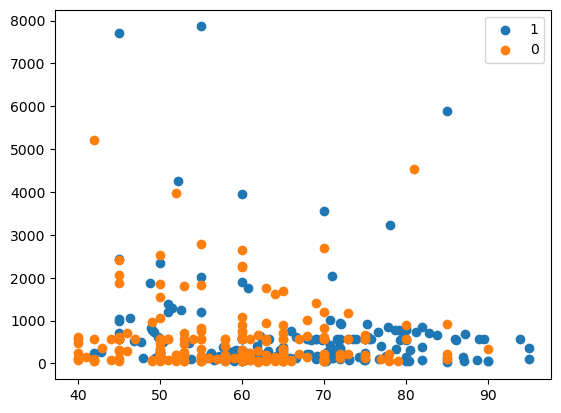

In [51]:
# scatter plot by class label
for label, _ in counter.items():
 row_ix = where(y_resample == label)[0]
 pyplot.scatter(x_resample[row_ix, 0], x_resample[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

**Keterangan:** <br>
Dapat dilihat berdasarkan scatter plot, persebaran DEATH_EVENT dengan keterangan 0 = tidak meninggal dan 1 = meninggal adalah seperti pada gambar diatas. Jumlahnya berada pada rentang 0 sampai 8000.

## J.6. Menyimpan Data Modelling SMOTE
Membuat array accuracy_list_smote untuk menyimpan daftar akurasi pada setiap model setelah dilakukan SMOTE.

In [52]:
accuracy_list_smote = []

## J.7. Mendefinisikan dan melatih kembali model

In [53]:
# Melatih model-model
rf_smote = rf_model.fit(x_train_resample, y_train_resample)
et_smote = et_model.fit(x_train_resample, y_train_resample)
gb_smote = gb_model.fit(x_train_resample, y_train_resample)
svm_smote = svm_model.fit(x_train_resample, y_train_resample)
lr_smote = lr_model.fit(x_train_resample, y_train_resample)

## J.8. Evaluasi model dengan SMOTE (Synthetic Minority Over-sampling Technique)

### J.8.1. Random Forest Classifier

In [54]:
rf_pred2 = rf_smote.predict(x_test_resample)

# evaluasi model
cm_1 = confusion_matrix(y_test_resample,rf_pred2)
print('Confusion matrix : \n', cm_1)

akurasi1 = accuracy_score(y_test_resample, rf_pred2)
accuracy_list_smote.append(100*akurasi1)
print("\nAkurasi Model :", akurasi1, "\n")
print(classification_report(y_test_resample,rf_pred2))

Confusion matrix : 
 [[39  2]
 [ 3 37]]

Akurasi Model : 0.9382716049382716 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.95      0.93      0.94        40

    accuracy                           0.94        81
   macro avg       0.94      0.94      0.94        81
weighted avg       0.94      0.94      0.94        81



### J.8.2. Extra Trees Classifier

In [55]:
et_pred2 = et_smote.predict(x_test_resample)

# evaluasi model
cm_2 = confusion_matrix(y_test_resample,et_pred2)
print('Confusion matrix : \n', cm_2)

akurasi2 = accuracy_score(y_test_resample, et_pred2)
accuracy_list_smote.append(100*akurasi2)
print("\nAkurasi Model :", akurasi2, "\n")
print(classification_report(y_test_resample,et_pred2))

Confusion matrix : 
 [[36  5]
 [ 2 38]]

Akurasi Model : 0.9135802469135802 

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        41
           1       0.88      0.95      0.92        40

    accuracy                           0.91        81
   macro avg       0.92      0.91      0.91        81
weighted avg       0.92      0.91      0.91        81



### J.8.3. Gradient Boosting Classifier

In [56]:
gb_pred2 = gb_smote.predict(x_test_resample)

# evaluasi model
cm_3 = confusion_matrix(y_test_resample,gb_pred2)
print('Confusion matrix : \n', cm_3)

akurasi3 = accuracy_score(y_test_resample, gb_pred2)
accuracy_list_smote.append(100*akurasi3)
print("\nAkurasi Model :", akurasi3, "\n")
print(classification_report(y_test_resample,gb_pred2))

Confusion matrix : 
 [[36  5]
 [ 3 37]]

Akurasi Model : 0.9012345679012346 

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        41
           1       0.88      0.93      0.90        40

    accuracy                           0.90        81
   macro avg       0.90      0.90      0.90        81
weighted avg       0.90      0.90      0.90        81



### J.8.4. Support Vector Machine

In [57]:
svm_pred2 = svm_smote.predict(x_test_resample)

# evaluasi model
cm_4 = confusion_matrix(y_test_resample,svm_pred2)
print('Confusion matrix : \n', cm_4)

akurasi4 = accuracy_score(y_test_resample, svm_pred2)
accuracy_list_smote.append(100*akurasi4)
print("\nAkurasi Model :", akurasi4, "\n")
print(classification_report(y_test_resample,svm_pred2))

Confusion matrix : 
 [[33  8]
 [ 7 33]]

Akurasi Model : 0.8148148148148148 

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.80      0.82      0.81        40

    accuracy                           0.81        81
   macro avg       0.81      0.81      0.81        81
weighted avg       0.82      0.81      0.81        81



### J.8.5. Logistic Regression

In [58]:
lr_pred2 = lr_smote.predict(x_test_resample)

# evaluasi model
cm_5 = confusion_matrix(y_test_resample, lr_pred2)
print('Confusion matrix : \n', cm_5)

akurasi5 = accuracy_score(y_test_resample, lr_pred2)
accuracy_list_smote.append(100*akurasi5)
print("\nAkurasi Model :", akurasi5, "\n")
print(classification_report(y_test_resample, lr_pred2))

Confusion matrix : 
 [[29 12]
 [ 8 32]]

Akurasi Model : 0.7530864197530864 

              precision    recall  f1-score   support

           0       0.78      0.71      0.74        41
           1       0.73      0.80      0.76        40

    accuracy                           0.75        81
   macro avg       0.76      0.75      0.75        81
weighted avg       0.76      0.75      0.75        81



# K. Ensemble Model

## K.1. Membuat dan melatih estimator untuk ensemble model

In [59]:
# Mendefinisikan estimator
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
gb = GradientBoostingClassifier()
lr = LogisticRegression()

## K.2 Mendefinisikan ensemble model 

In [60]:
estimators = [('rf', rf), ('et', et), ('gb', gb), ('lr', lr)]

voting_ensemble = VotingClassifier(estimators=estimators, voting='hard')
bagging_ensemble = BaggingClassifier(base_estimator=VotingClassifier(estimators=estimators, voting='hard'), n_estimators=10, random_state=42)
stacking_ensemble = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(random_state=42))
boost_ensemble = AdaBoostClassifier(base_estimator=gb, n_estimators=10, random_state=42)

## K.3. Evaluasi ensemble model

In [61]:
accuracy_list_ensemble = []

### K.3.1 Voting Ensemble

In [62]:
voting_ensemble.fit(x_train_resample, y_train_resample)
y_pred1 = voting_ensemble.predict(x_test_resample)

# evaluasi model
conma1 = confusion_matrix(y_test_resample,y_pred1)
print('Confusion matrix : \n', conma1)

akur1 = accuracy_score(y_test_resample, y_pred1)
accuracy_list_ensemble.append(100*akur1)
print("\nAkurasi Model :", akur1, "\n")
print(classification_report(y_test_resample,y_pred1))

Confusion matrix : 
 [[37  4]
 [ 4 36]]

Akurasi Model : 0.9012345679012346 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.90      0.90      0.90        40

    accuracy                           0.90        81
   macro avg       0.90      0.90      0.90        81
weighted avg       0.90      0.90      0.90        81



### K.3.2 Bagging Ensemble

In [63]:
bagging_ensemble.fit(x_train_resample, y_train_resample)
y_pred2 = bagging_ensemble.predict(x_test_resample)

# evaluasi model
conma2 = confusion_matrix(y_test_resample,y_pred2)
print('Confusion matrix : \n', conma2)

akur2 = accuracy_score(y_test_resample, y_pred2)
accuracy_list_ensemble.append(100*akur2)
print("\nAkurasi Model :", akur2, "\n")
print(classification_report(y_test_resample,y_pred2))

Confusion matrix : 
 [[39  2]
 [ 4 36]]

Akurasi Model : 0.9259259259259259 

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.95      0.90      0.92        40

    accuracy                           0.93        81
   macro avg       0.93      0.93      0.93        81
weighted avg       0.93      0.93      0.93        81



### K.3.3. Stacking ensemble

In [64]:
stacking_ensemble.fit(x_train_resample, y_train_resample)
y_pred3 = stacking_ensemble.predict(x_test_resample)

# evaluasi model
conma3 = confusion_matrix(y_test_resample,y_pred3)
print('Confusion matrix : \n', conma3)

akur3 = accuracy_score(y_test_resample, y_pred3)
accuracy_list_ensemble.append(100*akur3)
print("\nAkurasi Model :", akur3, "\n")
print(classification_report(y_test_resample,y_pred3))

Confusion matrix : 
 [[36  5]
 [ 4 36]]

Akurasi Model : 0.8888888888888888 

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.88      0.90      0.89        40

    accuracy                           0.89        81
   macro avg       0.89      0.89      0.89        81
weighted avg       0.89      0.89      0.89        81



### K.3.4. Boost Ensemble

In [65]:
boost_ensemble.fit(x_train_resample, y_train_resample)
y_pred4 = boost_ensemble.predict(x_test_resample)

# evaluasi model
conma4 = confusion_matrix(y_test_resample,y_pred4)
print('Confusion matrix : \n', conma4)

akur4 = accuracy_score(y_test_resample, y_pred4)
accuracy_list_ensemble.append(100*akur4)
print("\nAkurasi Model :", akur4, "\n")
print(classification_report(y_test_resample,y_pred4))

Confusion matrix : 
 [[36  5]
 [ 3 37]]

Akurasi Model : 0.9012345679012346 

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        41
           1       0.88      0.93      0.90        40

    accuracy                           0.90        81
   macro avg       0.90      0.90      0.90        81
weighted avg       0.90      0.90      0.90        81



# L. Model Inference

Model inference adalah model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan, ataupun data yang ada pada internet.

Pada model inference ini dibuat dataset yang serupa dengan dataset sebelumnya dengan total 17 kolom karena menggunakan one hot encoder. 17 kolom tersebut diantaranya adalah Usia,	Level_Enzim_CPK,	Fraksi_injeksi,	Trombosit,	Serum_keratin,	Serum_sodium,	Waktu,	Tidak_Anemia,	Anemia,	Tidak_Diabetes,	Diabetes,	Tidak_Tekanan_darting,	Tekanan_darting,	Wanita,	Pria,	Merokok, dan Tidak_merokok. Selanjutnya membuat prediksi menggunakan model yang sudah dijalankan sebelumnya. Pada model inference hanya menggunakan et_model karena memiliki akurasi yang paling tinggi diantara model lainnya. Untuk mengklasifikasi pasien meninggal atau tidak pada dataset model_inference.

In [66]:
model_inference = {'Usia':[65, 40, 78],
                   'Level_Enzim_CPK':[115,89,572],
                   'Fraksi_injeksi':[20, 30, 40],
                   'Trombosit':[245000.00, 178000.00, 193000.00],
                   'Serum_keratin':[1.8, 2.2, 1.7],
                   'Serum_sodium':[129, 130, 133],
                   'Waktu':[5,7,9],
                   'Tidak_Anemia':[0, 1, 1],
                   'Anaemia':[1,0,0],
                   'Tidak_Diabetes':[1, 0, 1],
                   'Diabetes':[0,1,0],
                   'Tidak_Tekanan_darting':[0, 1, 0],
                   'Tekanan_darting':[1,0,1],
                   'Wanita':[0, 0, 1],
                   'Pria':[1,1,0],
                   'Tidak_Merokok':[0, 0, 1],
                   'Merokok':[1,1,0]
                  }
model_inference = pd.DataFrame(model_inference)
model_inference

Usia  Level_Enzim_CPK  Fraksi_injeksi  Trombosit  Serum_keratin  \
0    65              115              20   245000.0            1.8   
1    40               89              30   178000.0            2.2   
2    78              572              40   193000.0            1.7   

   Serum_sodium  Waktu  Tidak_Anemia  Anaemia  Tidak_Diabetes  Diabetes  \
0           129      5             0        1               1         0   
1           130      7             1        0               0         1   
2           133      9             1        0               1         0   

   Tidak_Tekanan_darting  Tekanan_darting  Wanita  Pria  Tidak_Merokok  \
0                      0                1       0     1              0   
1                      1                0       0     1              0   
2                      0                1       1     0              1   

   Merokok  
0        1  
1        1  
2        0

In [67]:
prediksi = et_model.predict(model_inference)
prediksi

array([1, 1, 1], dtype=int64)

# M. Perbandingan akurasi model sebelum dan sesudah SMOTE serta menggunakan ensemble model

## M.1. Perbandingan akurasi model sebelum SMOTE

In [68]:
accuracy_list

[86.4406779661017,
 74.57627118644068,
 81.35593220338984,
 79.66101694915254,
 76.27118644067797]

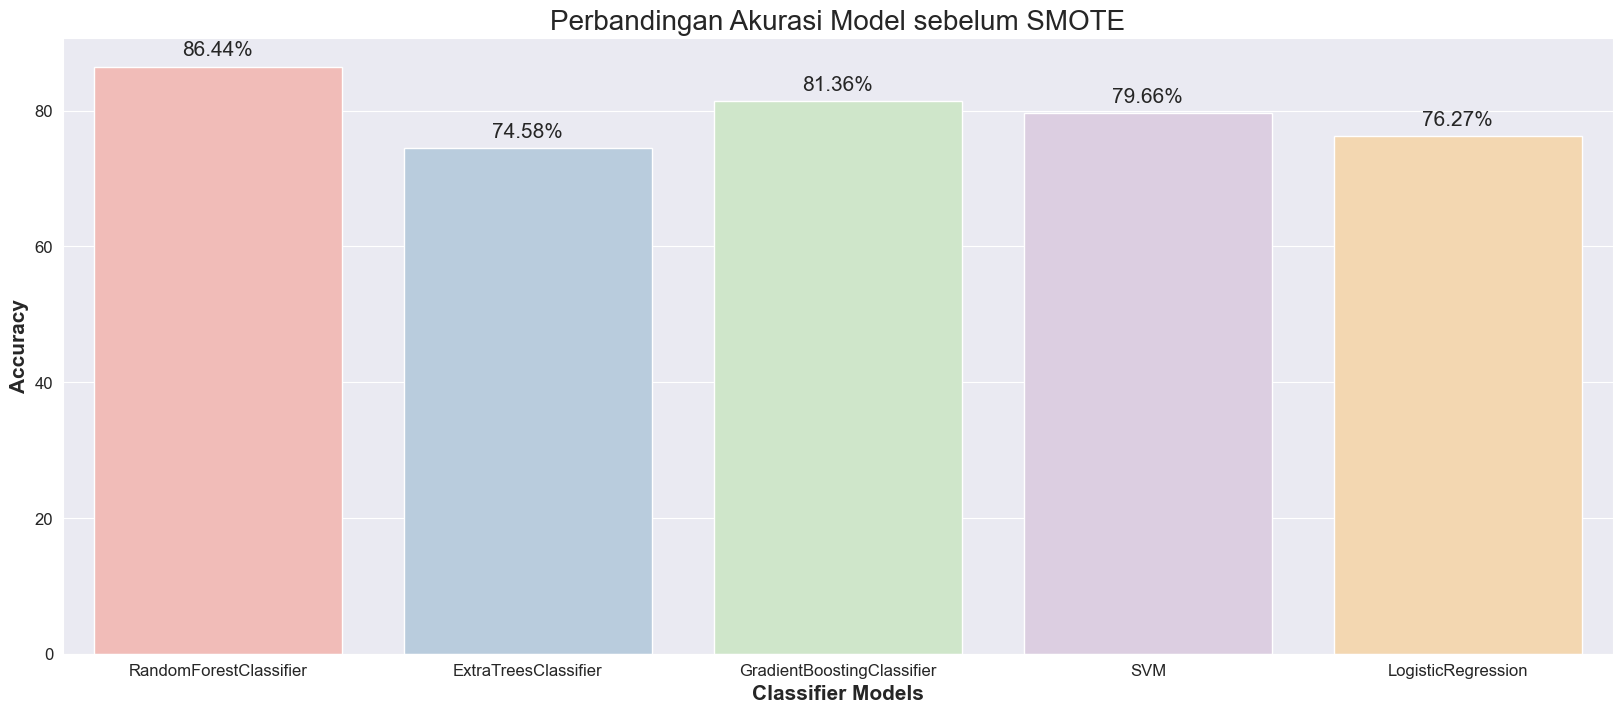

In [69]:
model_list = ['RandomForestClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'SVM', 'LogisticRegression']

plt.rcParams['figure.figsize'] = 20, 8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "Pastel1")
plt.xlabel('Classifier Models', fontsize = 15, fontweight = 'bold')
plt.ylabel('Accuracy', fontsize = 15, fontweight = 'bold')
plt.title('Perbandingan Akurasi Model sebelum SMOTE', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center')
plt.yticks(fontsize = 12)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 15)
    
plt.show()

## M.2. Perbandingan akurasi model sesudah SMOTE

In [70]:
accuracy_list_smote

[93.82716049382715,
 91.35802469135803,
 90.12345679012346,
 81.48148148148148,
 75.30864197530865]

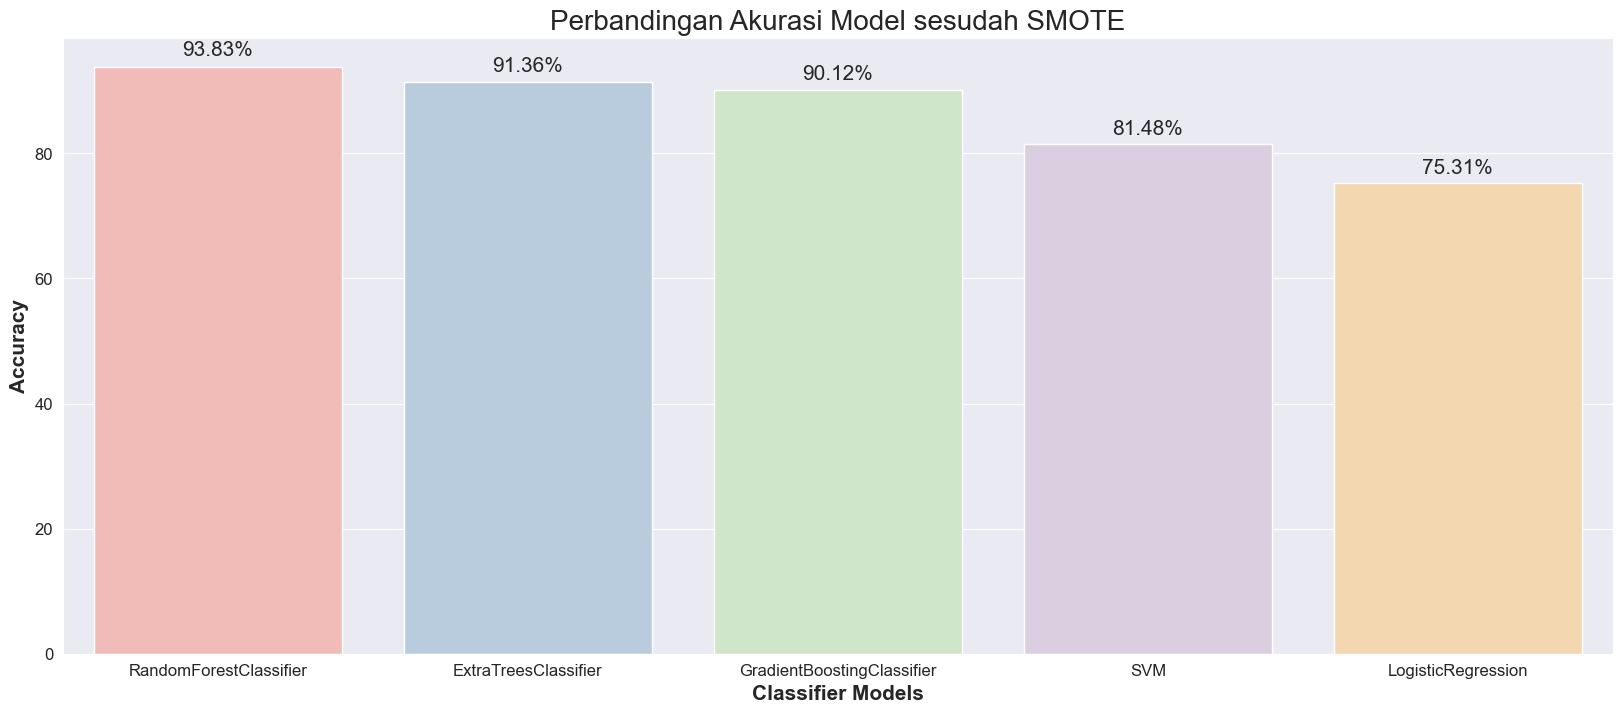

In [71]:
model_list = ['RandomForestClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'SVM', 'LogisticRegression']

plt.rcParams['figure.figsize'] = 20, 8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list_smote, palette = "Pastel1")
plt.xlabel('Classifier Models', fontsize = 15, fontweight = 'bold')
plt.ylabel('Accuracy', fontsize = 15, fontweight = 'bold')
plt.title('Perbandingan Akurasi Model sesudah SMOTE', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center')
plt.yticks(fontsize = 12)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 15)
    
plt.show()

## M.3. Perbandingan akurasi dengan menggunakan ensemble model

In [72]:
accuracy_list_ensemble

[90.12345679012346, 92.5925925925926, 88.88888888888889, 90.12345679012346]

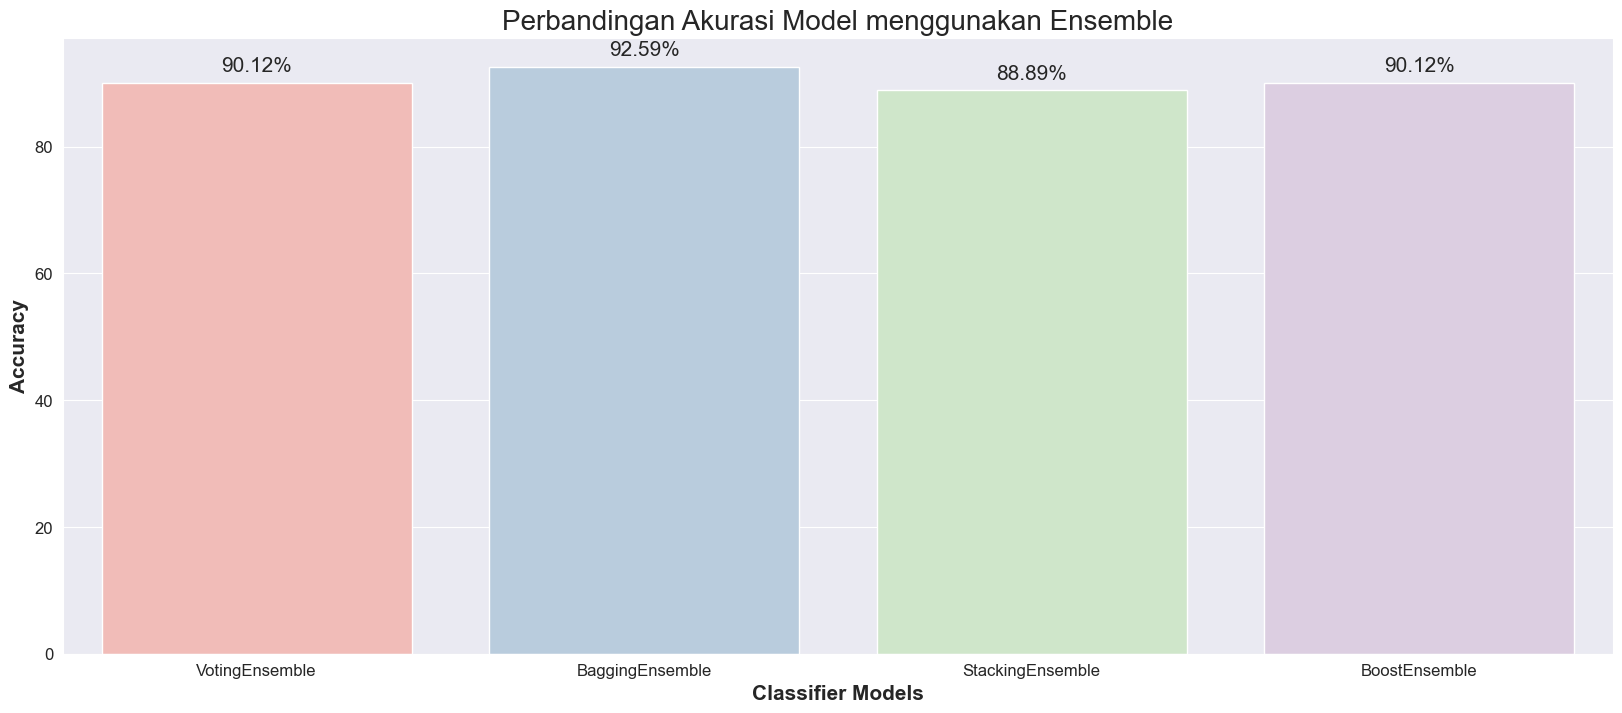

In [73]:
model_list = ['VotingEnsemble', 'BaggingEnsemble', 'StackingEnsemble', 'BoostEnsemble']

plt.rcParams['figure.figsize'] = 20, 8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list_ensemble, palette = "Pastel1")
plt.xlabel('Classifier Models', fontsize = 15, fontweight = 'bold')
plt.ylabel('Accuracy', fontsize = 15, fontweight = 'bold')
plt.title('Perbandingan Akurasi Model menggunakan Ensemble', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center')
plt.yticks(fontsize = 12)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 15)
    
plt.show()

# N. Kesimpulan

Pada final project ini dilakukan pemodelan menggunakan **RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, SVM, dan LogisticRegression** untuk mengklasifikasi terjadinya pasien meninggal dengan kondisi :
1. Dataset tersebut melalui proses data cleaning. Tidak terdeteksi missing value dan data duplikat pada dataset tersebut.
2. Kemudian, dilakukan proses pengecekan outlier di tiap-tiap kolom dataset. Ternyata ada cukup banyak outlier, namun pada dataset ini kami hanya menghapus outlier pada kolom ejection_fraction dan serum_sodium. Sedangkan semua nilai dalam kolom lainnya berada dalam rentang nilai yang memungkinkan jadi tidak perlu dihapus.
3. Selanjutnya dilakukan EDA untuk lebih memahami dataset tersebut.
4. Kemudian dilakukan proses one hot encoding dan feature scalling menggunakan minmaxscaler agar didapatkan hasil yang positif.
5. Melakukan modelling dengan menggunakan model RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, SVM, dan LogisticRegression. 
6. Karena hasilnya kurang optimal, kami melakukan balancing data. Pada project ini, kami menggunakan metode SMOTE (Synthetic Minority Over-sampling Technique). Alasannya karena menurut kami metode SMOTE mudah digunakan, menghasilkan data yang seimbang, dan mendapatkan data yang berjumlah banyak (karena dalam dataset ini jumlah data sangat sedikit). Selanjutnya kami melakukan evaluasi model dengan model yang sama.
7. Dan terakhir, membuat ensembel model (Voting, bagging, stacking, dan boost) kemudian dilakukan evaluasi model.

**Hal-hal yang berpengaruh pada hasil klasifikasi DEATH_EVENT (pasien meninggal) antara lain:**
1. Berdasarkan uji korelasi, **serum_creatinine** memiliki nilai korelasi sebesar 0.29. Artinya, jika semakin besar serum kreatinine pada darah, maka kemungkinan terjadinya pasien meninggal akan semakin besar juga.
2. Berdasarkan uji korelasi, **age** memiliki nilai korelasi sebesar 0.25. Artinya, jika semakin tua usia seorang pasien, maka kemungkinan terjadinya pasien meninggal akan semakin besar juga.
3. Berdasarkan uji korelasi, **high_blood_pressure** memiliki nilai korelasi sebesar 0.079. Artinya, jika semakin besar tekanan darah tinggi, maka kemungkinan terjadinya pasien meninggal akan semakin besar juga.
4. Berdasarkan uji korelasi, **anaemia** memiliki nilai korelasi sebesar 0.066. Artinya, jika kekurangan hemoglobin pada tubuh pasien semakin banyak, maka kemungkinan terjadinya pasien meninggal akan semakin besar juga.
5. Berdasarkan uji korelasi, **creatinine_phosphokinase** memiliki nilai korelasi sebesar 0.063. Artinya, jika level enzim CPK pada tubuh pasien semakin banyak, maka kemungkinan terjadinya pasien meninggal akan semakin besar juga.

# O. Deployment

In [74]:
import pickle

filename = 'prediksi_kematian.sav'
pickle.dump(rf_smote, open(filename,'wb'))

In [75]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')